# Working on Name Entity Recognition(NER) and Implementing various model  Based on that.

In [340]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Analysis the Dataset , Loading the Json dataset and converting them in CSV file

In [341]:
import json
with open('restaurant_intent_entities.json', 'r') as f:
    data = json.load(f)

In [342]:
stage_1 = data['rasa_nlu_data']['common_examples']

In [343]:
print(stage_1[0])

{'entities': [{'end': 20, 'entity': 'restaurant_name', 'start': 5, 'value': 'The Middle East'}, {'end': 31, 'entity': 'restaurant_type', 'start': 21, 'value': 'restaurant'}, {'end': 37, 'entity': 'state', 'start': 35, 'value': 'IN'}, {'end': 46, 'entity': 'timeRange', 'start': 42, 'value': 'noon'}], 'text': 'book The Middle East restaurant in IN for noon', 'intent': 'BookRestaurant'}


In [344]:
print(stage_1[0]['entities'])

[{'end': 20, 'entity': 'restaurant_name', 'start': 5, 'value': 'The Middle East'}, {'end': 31, 'entity': 'restaurant_type', 'start': 21, 'value': 'restaurant'}, {'end': 37, 'entity': 'state', 'start': 35, 'value': 'IN'}, {'end': 46, 'entity': 'timeRange', 'start': 42, 'value': 'noon'}]


In [345]:
array = []

for row in stage_1:
    for entity in row['entities']:
        array.append({
            'text': row['text'],
            'value': entity['value'],
            'entity': entity['entity'],
            'intent': row['intent']
            
        })
  

In [346]:
print(array[1])

{'text': 'book The Middle East restaurant in IN for noon', 'value': 'restaurant', 'entity': 'restaurant_type', 'intent': 'BookRestaurant'}


In [347]:
from pandas import DataFrame
import pandas as pd

In [348]:
df_1=DataFrame(array)

In [349]:
df_1.to_csv('res_check_1.csv')

In [350]:
res_entity=pd.read_csv('res_check_1.csv')

In [351]:
res_entity.head(20)

Unnamed: 0                                               text  \
0            0     book The Middle East restaurant in IN for noon   
1            1     book The Middle East restaurant in IN for noon   
2            2     book The Middle East restaurant in IN for noon   
3            3     book The Middle East restaurant in IN for noon   
4            4      Book a table at T-Rex distant from Halsey St.   
5            5      Book a table at T-Rex distant from Halsey St.   
6            6      Book a table at T-Rex distant from Halsey St.   
7            7  I'd like to eat at a taverna that serves chili...   
8            8  I'd like to eat at a taverna that serves chili...   
9            9  I'd like to eat at a taverna that serves chili...   
10          10  I have a party of four in Japan and need a res...   
11          11  I have a party of four in Japan and need a res...   
12          12  I have a party of four in Japan and need a res...   
13          13  I have a party of four in Japan and need a res...   
14          14  Please make a restaurant reservation for somew...   
15          15  Please make a restaurant reservation for somew...   
16          16  Please make a restaurant reservation for somew...   
17          17                        book a spot far from Ã…land   
18          18                        book a spot far from Ã…land   
19          19  I'd like to eat at the best restaurant in Coalton   

                       value             entity          intent  
0            The Middle East    restaurant_name  BookRestaurant  
1                 restaurant    restaurant_type  BookRestaurant  
2                         IN              state  BookRestaurant  
3                       noon          timeRange  BookRestaurant  
4                      T-Rex    restaurant_name  BookRestaurant  
5                    distant   spatial_relation  BookRestaurant  
6                  Halsey St                poi  BookRestaurant  
7                    taverna    restaurant_type  BookRestaurant  
8            chili con carne        served_dish  BookRestaurant  
9                         10  party_size_number  BookRestaurant  
10                      four  party_size_number  BookRestaurant  
11                     Japan            country  BookRestaurant  
12  Rimsky-Korsakoffee House    restaurant_name  BookRestaurant  
13              Aug. the 3rd          timeRange  BookRestaurant  
14                restaurant    restaurant_type  BookRestaurant  
15                   Mondovi               city  BookRestaurant  
16               Connecticut              state  BookRestaurant  
17                       far   spatial_relation  BookRestaurant  
18                    Ã…land            country  BookRestaurant  
19                      best               sort  BookRestaurant

In [352]:
len(res_entity) # there are total 6418 records in our dataset

6418

# Visualizing of our Dataset

In [353]:
from matplotlib import pyplot as plt

In [354]:
x=list(res_entity['entity'].value_counts())
y=list(res_entity['entity'].value_counts().keys())

Below is the Histograms showing the distribution of the Entities in our Dataset

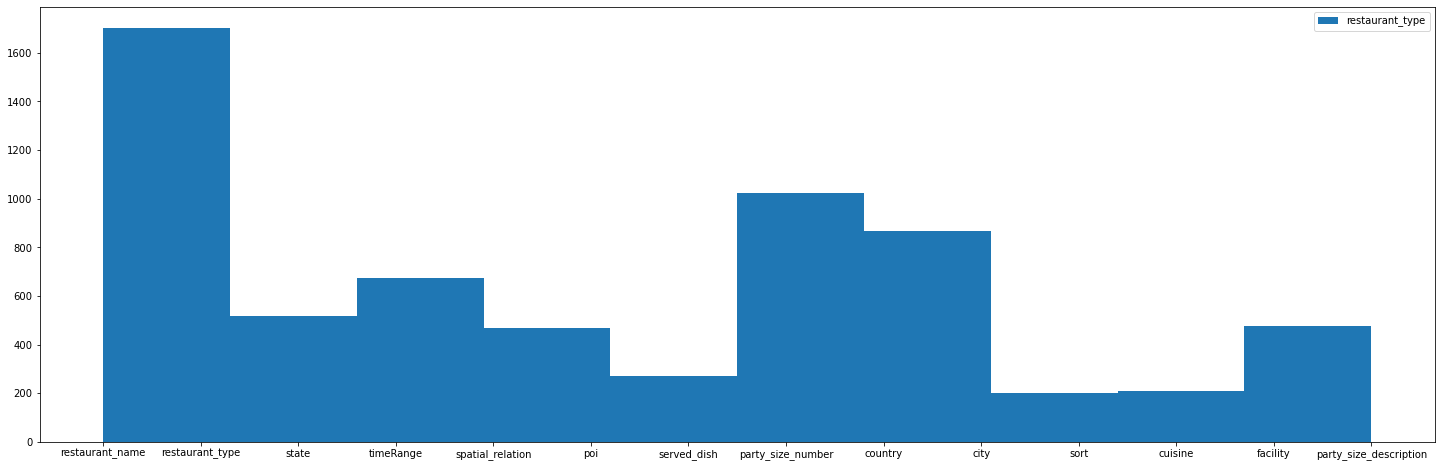

In [355]:
plt.figure(figsize=(25,8))
plt.hist(res_entity['entity'],label=y)
plt.legend()
plt.show()

Below is our Pie Chart show the the number of Entities Distribution below we can see the restraurant type has maximum share in the pie chart that is 21.3% followed by party_size number i.e. 16%

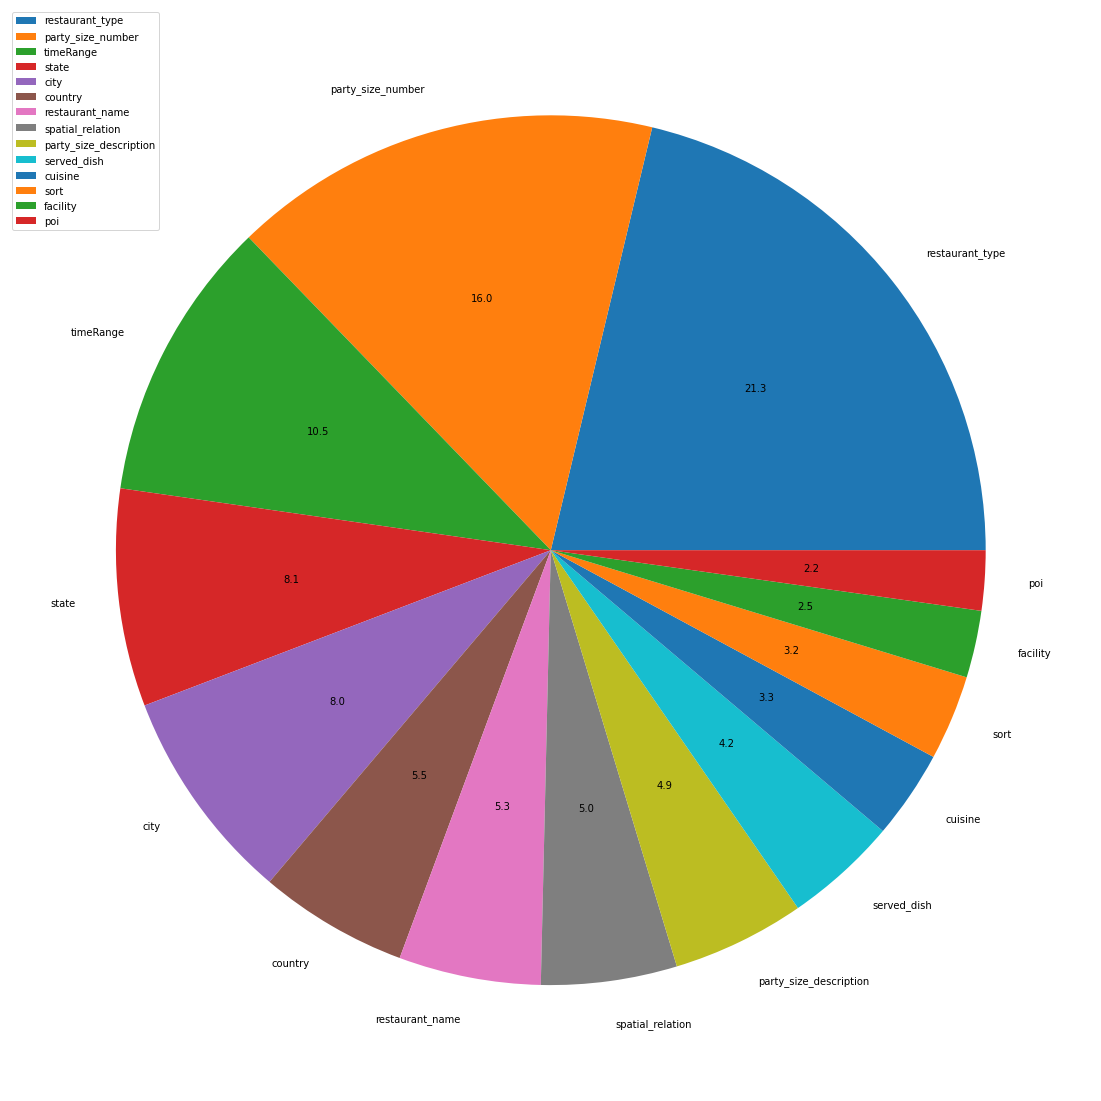

In [356]:
plt.figure(figsize=(20,20))
x=list(res_entity['entity'].value_counts())
y=list(res_entity['entity'].value_counts().keys())
plt.pie(x,labels=y,autopct='%.1f')
plt.legend()
plt.show() 

In [357]:
res_entity['entity'].value_counts()

restaurant_type           1364
party_size_number         1025
timeRange                  674
state                      519
city                       513
country                    356
restaurant_name            339
spatial_relation           324
party_size_description     317
served_dish                270
cuisine                    211
sort                       203
facility                   160
poi                        143
Name: entity, dtype: int64

In [358]:
x=list(res_entity['entity'].value_counts().keys())

In [359]:
print(x)     

['restaurant_type', 'party_size_number', 'timeRange', 'state', 'city', 'country', 'restaurant_name', 'spatial_relation', 'party_size_description', 'served_dish', 'cuisine', 'sort', 'facility', 'poi']


In [360]:
y=list(res_entity['entity'].value_counts())

In [361]:
print(y)

[1364, 1025, 674, 519, 513, 356, 339, 324, 317, 270, 211, 203, 160, 143]


Here is the bar plot showing the different entities

No handles with labels found to put in legend.


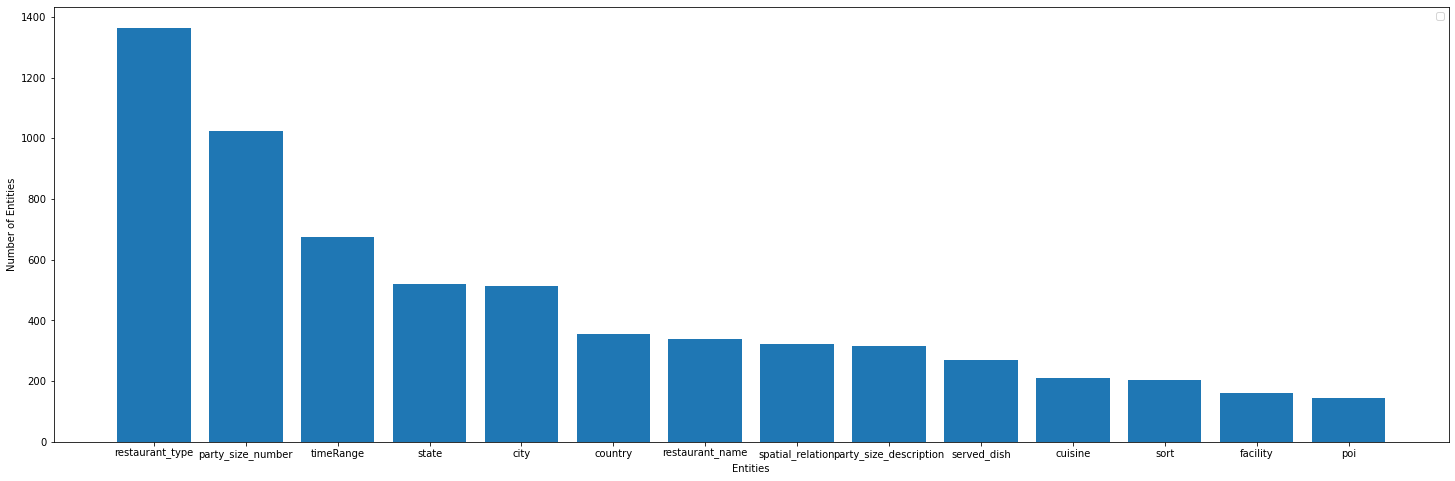

In [362]:
plt.figure(figsize=(25,8)) 
plt.bar(x,y)
plt.xlabel('Entities')
plt.ylabel('Number of Entities')
plt.legend()
plt.show()

Displaying the histogram with Entities

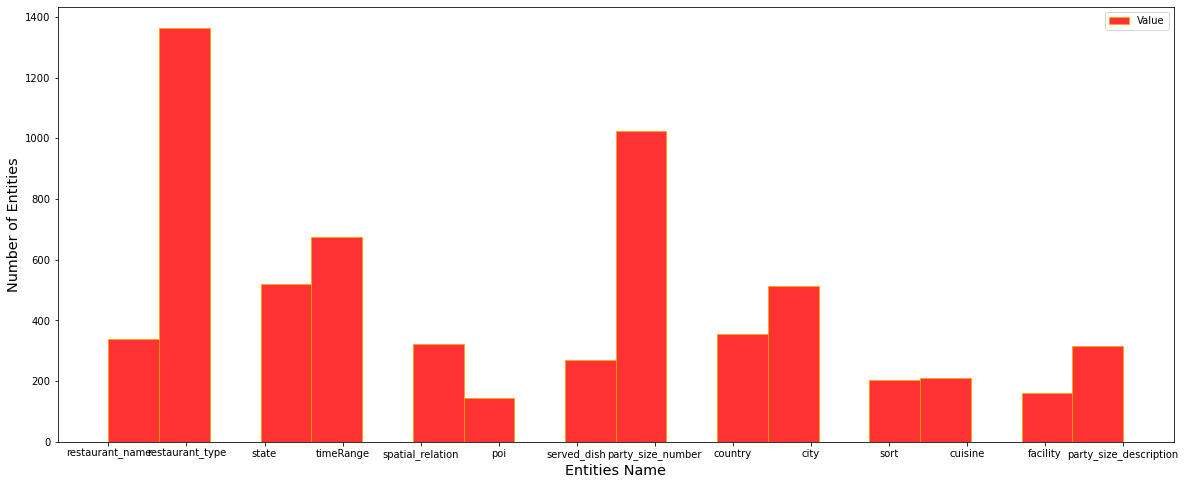

In [363]:
plt.figure(figsize=(20,8)) 
n,bins,patch = plt.hist(res_entity['entity'],bins=20, color='red', alpha=0.8, label='Value', edgecolor='orange', linewidth=1)
plt.legend()
plt.ylabel('Number of Entities', size='x-large')
plt.xlabel('Entities Name', size= 'x-large')
plt.show()

In [364]:
res_entity.head(10)

Unnamed: 0                                               text  \
0           0     book The Middle East restaurant in IN for noon   
1           1     book The Middle East restaurant in IN for noon   
2           2     book The Middle East restaurant in IN for noon   
3           3     book The Middle East restaurant in IN for noon   
4           4      Book a table at T-Rex distant from Halsey St.   
5           5      Book a table at T-Rex distant from Halsey St.   
6           6      Book a table at T-Rex distant from Halsey St.   
7           7  I'd like to eat at a taverna that serves chili...   
8           8  I'd like to eat at a taverna that serves chili...   
9           9  I'd like to eat at a taverna that serves chili...   

             value             entity          intent  
0  The Middle East    restaurant_name  BookRestaurant  
1       restaurant    restaurant_type  BookRestaurant  
2               IN              state  BookRestaurant  
3             noon          timeRange  BookRestaurant  
4            T-Rex    restaurant_name  BookRestaurant  
5          distant   spatial_relation  BookRestaurant  
6        Halsey St                poi  BookRestaurant  
7          taverna    restaurant_type  BookRestaurant  
8  chili con carne        served_dish  BookRestaurant  
9               10  party_size_number  BookRestaurant

Most frequent word in my Dataset 

In [365]:
from collections import Counter

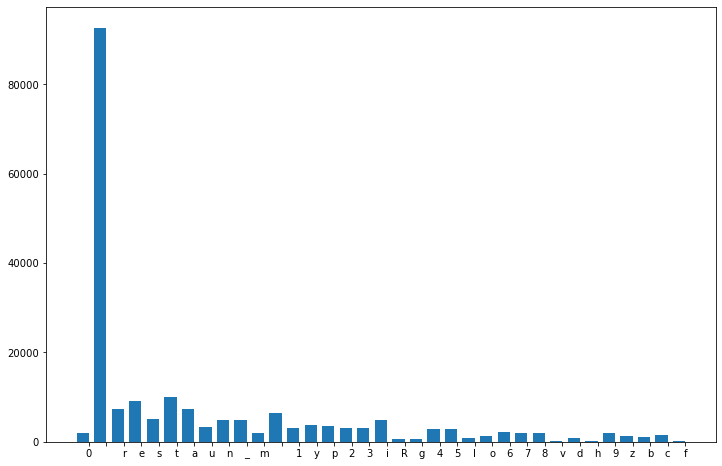

In [366]:
counter = Counter(res_entity['entity'].to_string())
data_words = counter.keys()
words_counts = counter.values()
indexes = np.arange(len(data_words))
width = 0.7
fig, ax = plt.subplots(figsize=(12, 8))
plt.bar(indexes, words_counts, width)
plt.xticks(indexes + width * 0.5, data_words)
plt.show()

In [367]:
#Counting the number of words and Displaying in Graphical terms this is just for reference

In [368]:
import re  # regular expression libraries to clean or filter the data
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=''
review=''
for i in range(0,len(res_entity)):
    
    review=re.sub('[^a-zA-Z]', ' ',res_entity['text'][i])#we have create dthe regular expression in whicch we have single spaces and has alphabets A-Z
    review=review.lower() #making all of Reviews in lower case 
    review=review.split() #once we use split we canb see the extra spaces are been removed and it is store in list now
    review = ' '.join(review)
    corpus+=str(review)

In [369]:
c1=corpus.split()

In [370]:
stopword=["i", "me", "my", "myself", "we", "our", "ours", "this", "you","the","in", 
    "your", "yours", "yourself", "yourselves", "because", "him", "his","is", "himself"]

In [371]:
str1=[]
for c in c1:
    if c in stopword:
        str1.append(c)

In [372]:
str1

['the',
 'in',
 'in',
 'the',
 'in',
 'in',
 'the',
 'in',
 'in',
 'the',
 'in',
 'in',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'in',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'is',
 'in',
 'is',
 'in',
 'is',
 'i',
 'in',
 'i',
 'in',
 'i',
 'in',
 'i',
 'in',
 'in',
 'in',
 'in',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'in',
 'in',
 'in',
 'is',
 'in',
 'is',
 'in',
 'is',
 'in',
 'is',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'the',
 'in',
 'the',
 'in',
 'the',
 'in',
 'my',
 'i',
 'my',
 'i',
 'my',
 'i',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',
 'in',


In [373]:
pd.value_counts(np.array(str1))

in      4500
the     1378
me       878
my       435
i        352
is       236
this     134
you       84
our       33
your      17
we         6
dtype: int64

In [374]:
x_stopwords=list(pd.value_counts(np.array(str1)).keys())

In [375]:
x_stopwords

['in', 'the', 'me', 'my', 'i', 'is', 'this', 'you', 'our', 'your', 'we']

In [376]:
y_stopwords=list(pd.value_counts(np.array(str1)))

In [377]:
y_stopwords

[4500, 1378, 878, 435, 352, 236, 134, 84, 33, 17, 6]

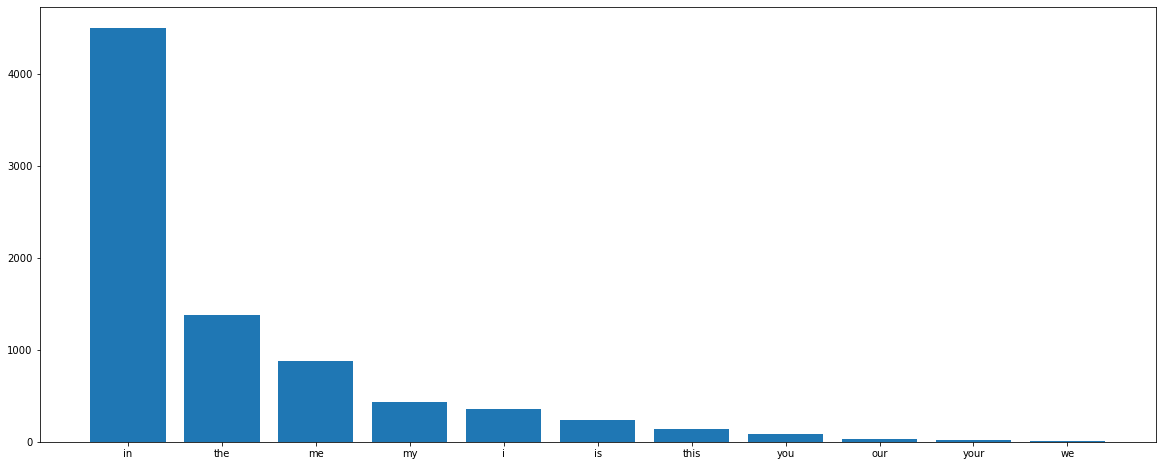

In [378]:
plt.figure(figsize=(20,8)) 
plt.bar(x_stopwords,y_stopwords)
plt.show()

Displaying the Pie chart for the count of the stopwords

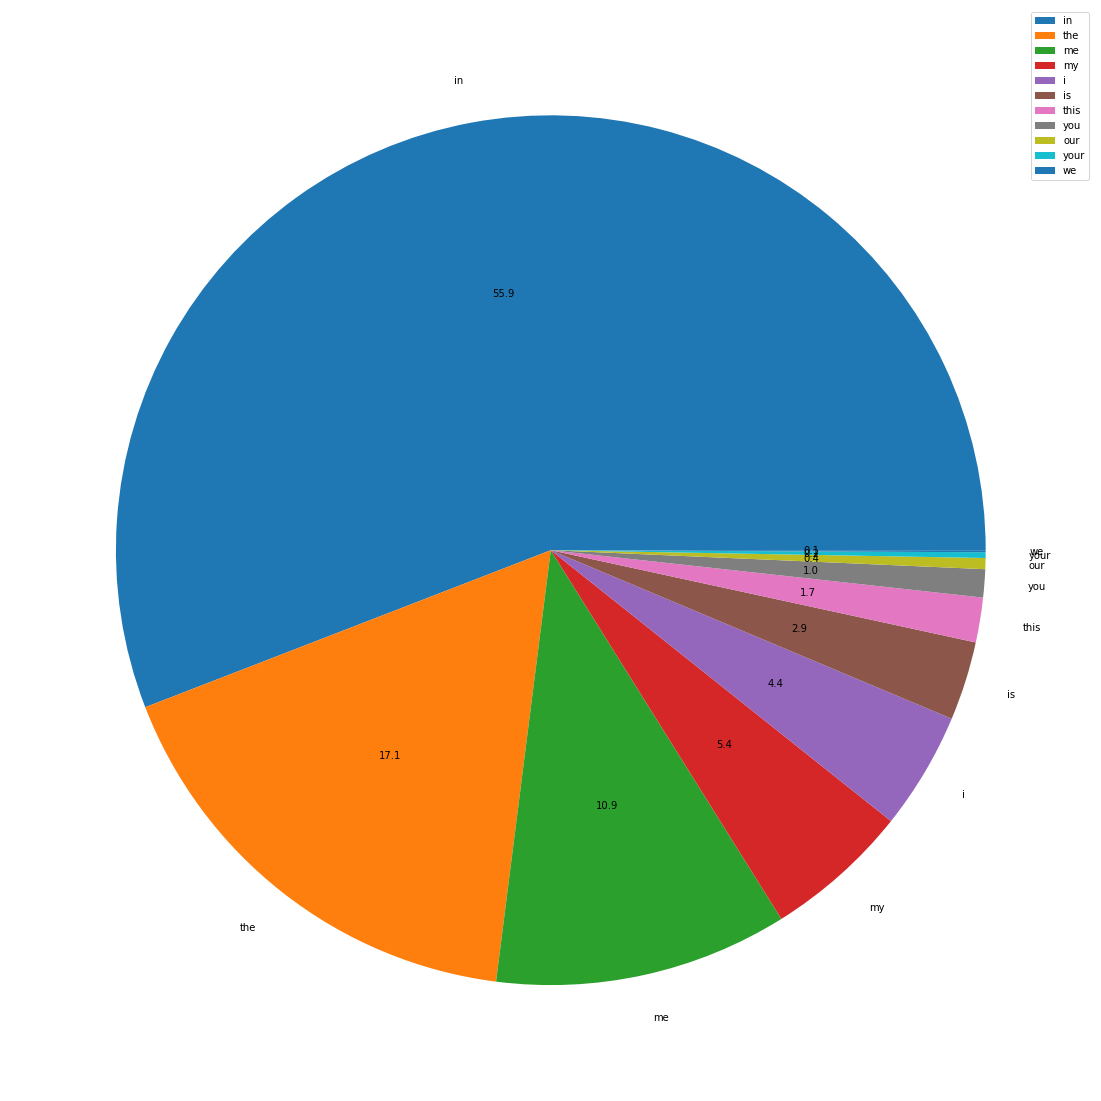

In [379]:
plt.figure(figsize=(20,20))
plt.pie(y_stopwords,labels=x_stopwords,autopct='%.1f')
plt.legend()
plt.show() 

Hre we can see majority share of the stopwords here is contain by "in" that is 56% approx

# Merging the Entities and Renaming them for Example County,Country,District lets merge into one Entity "Location"

In [380]:
res_entity.head(10)

Unnamed: 0                                               text  \
0           0     book The Middle East restaurant in IN for noon   
1           1     book The Middle East restaurant in IN for noon   
2           2     book The Middle East restaurant in IN for noon   
3           3     book The Middle East restaurant in IN for noon   
4           4      Book a table at T-Rex distant from Halsey St.   
5           5      Book a table at T-Rex distant from Halsey St.   
6           6      Book a table at T-Rex distant from Halsey St.   
7           7  I'd like to eat at a taverna that serves chili...   
8           8  I'd like to eat at a taverna that serves chili...   
9           9  I'd like to eat at a taverna that serves chili...   

             value             entity          intent  
0  The Middle East    restaurant_name  BookRestaurant  
1       restaurant    restaurant_type  BookRestaurant  
2               IN              state  BookRestaurant  
3             noon          timeRange  BookRestaurant  
4            T-Rex    restaurant_name  BookRestaurant  
5          distant   spatial_relation  BookRestaurant  
6        Halsey St                poi  BookRestaurant  
7          taverna    restaurant_type  BookRestaurant  
8  chili con carne        served_dish  BookRestaurant  
9               10  party_size_number  BookRestaurant

In [381]:
res_entity['entity'].value_counts()

restaurant_type           1364
party_size_number         1025
timeRange                  674
state                      519
city                       513
country                    356
restaurant_name            339
spatial_relation           324
party_size_description     317
served_dish                270
cuisine                    211
sort                       203
facility                   160
poi                        143
Name: entity, dtype: int64

In [382]:
res_entity['entity'].replace("state","location")

0       restaurant_name
1       restaurant_type
2              location
3             timeRange
4       restaurant_name
             ...       
6413            country
6414          timeRange
6415    restaurant_type
6416          timeRange
6417        served_dish
Name: entity, Length: 6418, dtype: object

In [383]:
res_entity['entity']=res_entity['entity'].replace("state","location")
res_entity['entity']=res_entity['entity'].replace("city","location")
res_entity['entity']=res_entity['entity'].replace("country","location")

In [384]:
res_entity.head(30)

Unnamed: 0                                               text  \
0            0     book The Middle East restaurant in IN for noon   
1            1     book The Middle East restaurant in IN for noon   
2            2     book The Middle East restaurant in IN for noon   
3            3     book The Middle East restaurant in IN for noon   
4            4      Book a table at T-Rex distant from Halsey St.   
5            5      Book a table at T-Rex distant from Halsey St.   
6            6      Book a table at T-Rex distant from Halsey St.   
7            7  I'd like to eat at a taverna that serves chili...   
8            8  I'd like to eat at a taverna that serves chili...   
9            9  I'd like to eat at a taverna that serves chili...   
10          10  I have a party of four in Japan and need a res...   
11          11  I have a party of four in Japan and need a res...   
12          12  I have a party of four in Japan and need a res...   
13          13  I have a party of four in Japan and need a res...   
14          14  Please make a restaurant reservation for somew...   
15          15  Please make a restaurant reservation for somew...   
16          16  Please make a restaurant reservation for somew...   
17          17                        book a spot far from Ã…land   
18          18                        book a spot far from Ã…land   
19          19  I'd like to eat at the best restaurant in Coalton   
20          20  I'd like to eat at the best restaurant in Coalton   
21          21  I'd like to eat at the best restaurant in Coalton   
22          22  book a taverna that serves vichyssoise within ...   
23          23  book a taverna that serves vichyssoise within ...   
24          24  book a taverna that serves vichyssoise within ...   
25          25  book a taverna that serves vichyssoise within ...   
26          26  I want to book a popular tyrolean steakhouse i...   
27          27  I want to book a popular tyrolean steakhouse i...   
28          28  I want to book a popular tyrolean steakhouse i...   
29          29  I want to book a popular tyrolean steakhouse i...   

                       value             entity          intent  
0            The Middle East    restaurant_name  BookRestaurant  
1                 restaurant    restaurant_type  BookRestaurant  
2                         IN           location  BookRestaurant  
3                       noon          timeRange  BookRestaurant  
4                      T-Rex    restaurant_name  BookRestaurant  
5                    distant   spatial_relation  BookRestaurant  
6                  Halsey St                poi  BookRestaurant  
7                    taverna    restaurant_type  BookRestaurant  
8            chili con carne        served_dish  BookRestaurant  
9                         10  party_size_number  BookRestaurant  
10                      four  party_size_number  BookRestaurant  
11                     Japan           location  BookRestaurant  
12  Rimsky-Korsakoffee House    restaurant_name  BookRestaurant  
13              Aug. the 3rd          timeRange  BookRestaurant  
14                restaurant    restaurant_type  BookRestaurant  
15                   Mondovi           location  BookRestaurant  
16               Connecticut           location  BookRestaurant  
17                       far   spatial_relation  BookRestaurant  
18                    Ã…land           location  BookRestaurant  
19                      best               sort  BookRestaurant  
20                restaurant    restaurant_type  BookRestaurant  
21                   Coalton           location  BookRestaurant  
22                   taverna    restaurant_type  BookRestaurant  
23               vichyssoise        served_dish  BookRestaurant  
24   within walking distance   spatial_relation  BookRestaurant  
25                        OH           location  BookRestaurant  
26                   popular               sort  BookRestaurant  
27              

In [385]:
res_entity['entity'].value_counts()

location                  1388
restaurant_type           1364
party_size_number         1025
timeRange                  674
restaurant_name            339
spatial_relation           324
party_size_description     317
served_dish                270
cuisine                    211
sort                       203
facility                   160
poi                        143
Name: entity, dtype: int64

In [386]:
res_entity['entity']=res_entity['entity'].replace("restaurant_type","restaurant")
res_entity['entity']=res_entity['entity'].replace("restaurant_name","restaurant")
res_entity['entity']=res_entity['entity'].replace("party_size_number","number")

In [387]:
entity=res_entity['entity'].value_counts()

In [388]:
entity.count()

11

In [389]:
res_entity.head()

Unnamed: 0                                            text  \
0           0  book The Middle East restaurant in IN for noon   
1           1  book The Middle East restaurant in IN for noon   
2           2  book The Middle East restaurant in IN for noon   
3           3  book The Middle East restaurant in IN for noon   
4           4   Book a table at T-Rex distant from Halsey St.   

             value      entity          intent  
0  The Middle East  restaurant  BookRestaurant  
1       restaurant  restaurant  BookRestaurant  
2               IN    location  BookRestaurant  
3             noon   timeRange  BookRestaurant  
4            T-Rex  restaurant  BookRestaurant

In [390]:
entity

restaurant                1703
location                  1388
number                    1025
timeRange                  674
spatial_relation           324
party_size_description     317
served_dish                270
cuisine                    211
sort                       203
facility                   160
poi                        143
Name: entity, dtype: int64

Analyse the final Entity labels Data .. Earlier we have 14 entities now we have 11 entities as per our dataset

In [391]:
y_ent=list(res_entity['entity'].value_counts())

In [392]:
y_ent

[1703, 1388, 1025, 674, 324, 317, 270, 211, 203, 160, 143]

In [393]:
x_ent=list(res_entity['entity'].value_counts().keys())

In [394]:
x_ent

['restaurant',
 'location',
 'number',
 'timeRange',
 'spatial_relation',
 'party_size_description',
 'served_dish',
 'cuisine',
 'sort',
 'facility',
 'poi']

In [395]:
#Displaying the bar Graph after merging the Entities

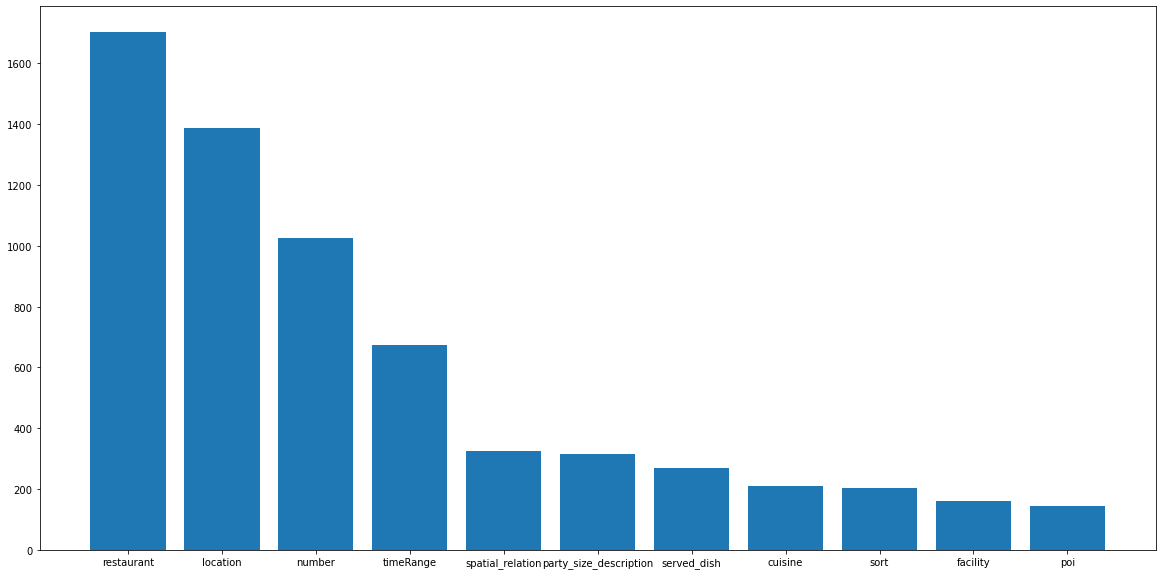

In [396]:
plt.figure(figsize=(20,10))
plt.bar(x_ent,y_ent)
plt.show()

In [397]:
#Displaying the Pie Charts

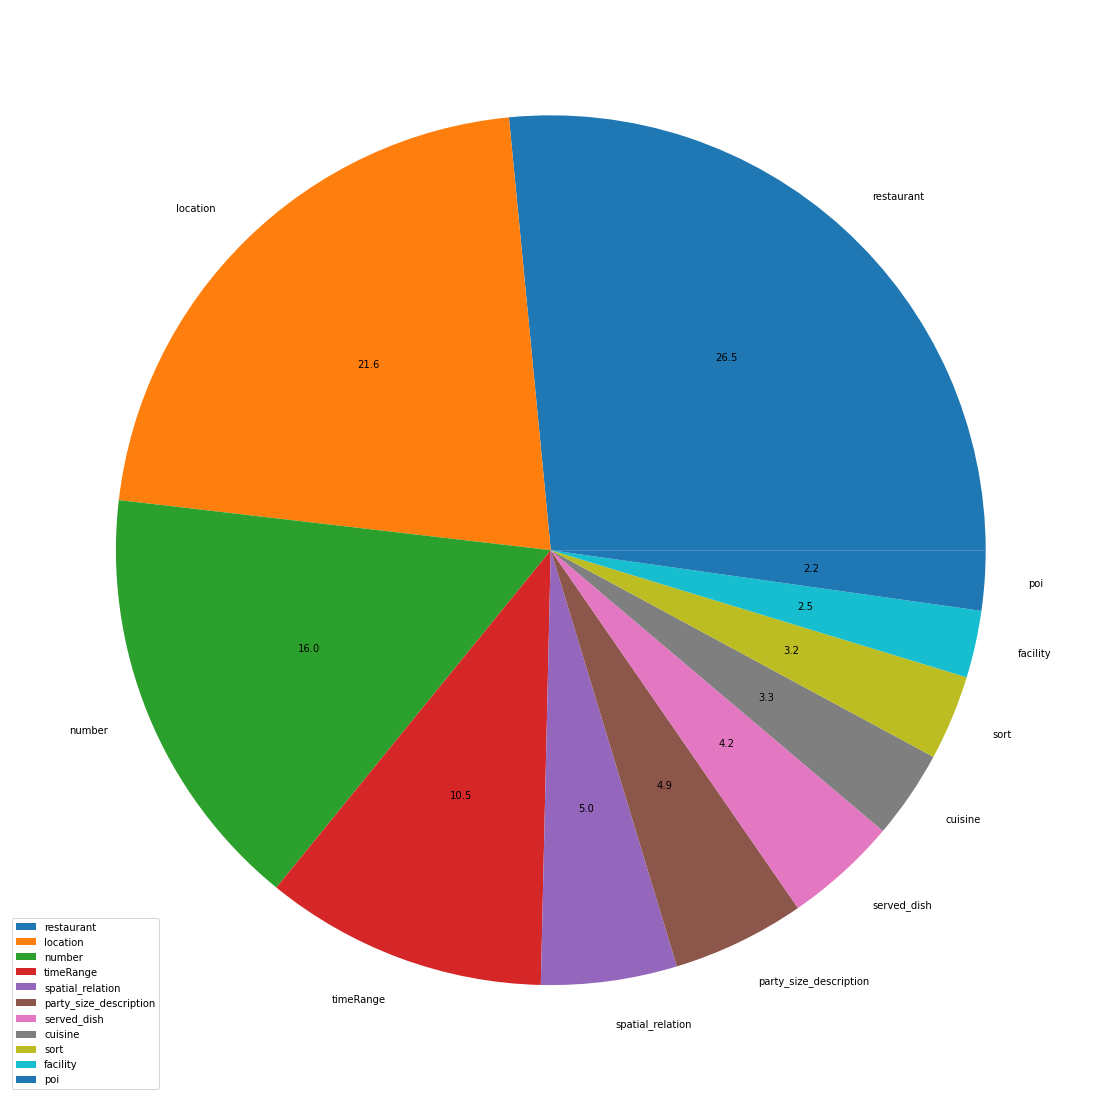

In [398]:
plt.figure(figsize=(20,20))
plt.pie(y_ent,labels=x_ent,autopct='%.1f')
plt.legend()
plt.show() 

Here we can see the majority of the share of Entities we have is "Restraurant" and "Location"

# Data Preprocessing Techniques using PorterStemmer, Tokenizer and Applying Stopwords Libraries

In [399]:
#Now we need to clean  our text or Normalizing the dataset . For cleaning the datawe have many libraries but here we are using 
#nltk 

In [400]:
import re  # regular expression libraries to clean or filter the data
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
review=re.sub('[^a-zA-Z]', ' ',res_entity['text'][0])#we have create dthe regular expression in whicch we have single spaces and has alphabets A-Z
review=review.lower() #making all of Reviews in lower case 
review=review.split() #once we use split we canb see the extra spaces are been removed and it is store in list now



In [401]:
review # here we can see that it is still showing the stopwords to remove or ignore this we use stopwords class with PortStemmer()

['book', 'the', 'middle', 'east', 'restaurant', 'in', 'in', 'for', 'noon']

In [402]:
ps=PorterStemmer() #It is use to ignore the stopwords
review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #enclose the stopwords in list which need to be ignore
#after ignoring the stopwords let join the other words in review 
review = ' '.join(review)
#now all stop words is remove and output be like this ''wow love place' this has been removed from here 

In [403]:
review # after using stopwords class with PortStemmer() it ignore the stop words as we can see below #this is removed 

'book middl east restaur noon'

Till here we have clean our dataset by removing dots ..., fullstop., UpperCase,Stopwords like this ,then and so on .... So here our prepossing part came to end . Now we will do this steps in all are rows as earlier we do it for first row[0] in our dataset to do this we will make a for loop and store our pre processing things in that, Earlier we are storing the data in review now we require the corpus where we store all our data, As shown below.

In [404]:
import re  # regular expression libraries to clean or filter the data
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[] #we make the empty list
for i in range(0,len(res_entity)):
    review=re.sub('[^a-zA-Z]', ' ',res_entity['text'][i])#we have create dthe regular expression in whicch we have single spaces and has alphabets A-Z
    review=review.lower() #making all of Reviews in lower case 
    review=review.split() #once we use split we canb see the extra spaces are been removed and it is store in list now
    ps=PorterStemmer() #It is use to ignore the stopwords
    review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #enclose the stopwords in list which need to be ignore
    #after ignoring the stopwords let join the other words in review 
    review = ' '.join(review)
    #now all stop words is remove and output be like this ''wow love place' this has been removed from here 
    corpus.append(review)

# After Removing all Stopwords and Normalizing the Text

In [405]:
print(corpus[1:5])

['book middl east restaur noon', 'book middl east restaur noon', 'book middl east restaur noon', 'book tabl rex distant halsey st']


# NLP Algorithms/Techniques and their advantage and disadvantage

# 1.Lemmatization and Stemming

Reference[4]:https://www.guru99.com/stemming-lemmatization-python-nltk.html#:~:text=Stemming%20and%20Lemmatization%20in%20Python%20NLTK%20are%20text,it%20knows%20the%20context%20of%20words%20before%20processing.

firstly we want to understand why we required this Techniques in making the reliable ... Answer is let take one example 

# Stemming:

Stemming is generally normalizing the words.. for example there is one root words for many same words or sentence for example ..He was eating , He weas eating a food so in Stem ing and Lemmatization it was treated as a single row of the data .,Let takes some example below:

In [406]:
from nltk.stem import PorterStemmer
words= ["wait", "waiting", "waited", "waits"]
ps =PorterStemmer()
for w1 in words:
    actualWord=ps.stem(w1)
    print(actualWord)

wait
wait
wait
wait


Here you can see that we have different list of the words like wait , waits , waiting and so on and using the PortStemmer object as ps and putting them in the for loop it has provide one actual or root word for all all the words i.e waits so that how Lemmatisation and stemming works in reducing the row of the data and converting the words into the single actual root of that words

In [407]:
# Lets see how Stemming and Lemmatization works and which is is better 

In [408]:
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer  = PorterStemmer()
text1 = res_entity['text'][0]
tokenization = nltk.word_tokenize(text1)
for w1 in tokenization:
    print("Stemming for {} is {}".format(w1,porter_stemmer.stem(w1)))

Stemming for book is book
Stemming for The is the
Stemming for Middle is middl
Stemming for East is east
Stemming for restaurant is restaur
Stemming for in is in
Stemming for IN is in
Stemming for for is for
Stemming for noon is noon


Here we can see we have only taken the first object of our dataset and we have seen that using the nltk stem library and using the PortStemmer function we have converted them into the Stemming form but here we can see that there are few words which lost there meaning after converting for example Middle as middl and many more ..Let see how Lemmatization works


In [409]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
text1 = res_entity['text'][0]
tokenization_1 = nltk.word_tokenize(text1)
for w1 in tokenization_1:
    print("Lemma for {} is {}".format(w1, wordnet_lemmatizer.lemmatize(w1)))

Lemma for book is book
Lemma for The is The
Lemma for Middle is Middle
Lemma for East is East
Lemma for restaurant is restaurant
Lemma for in is in
Lemma for IN is IN
Lemma for for is for
Lemma for noon is noon


Here we can se ethat Lemmatization is showing the better result that Stemmer 

As shown in above code lets do Lemmatization and Stemming stuff:


In [410]:
import re  # regular expression libraries to clean or filter the data
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
corpus=[] #we make the empty list
for i in range(0,len(res_entity)):
    review=re.sub('[^a-zA-Z]', ' ',res_entity['text'][i])#we have create dthe regular expression in whicch we have single spaces and has alphabets A-Z
    review=review.lower() #making all of Reviews in lower case 
    review=review.split() #once we use split we canb see the extra spaces are been removed and it is store in list now
    ps=PorterStemmer() #It is use to ignore the stopwords
    review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #enclose the stopwords in list which need to be ignore
    #after ignoring the stopwords let join the other words in review 
    review = ' '.join(review)
    #now all stop words is remove and output be like this ''wow love place' this has been removed from here 
    corpus.append(review)

In [411]:
corpus[1]

'book middl east restaur noon'

Concluding the Lemmatization and Stemming .. It is clearly show that Lemma works best than Stemming as in Stemming we can clearly see that Stemming algorithms works by cutting the suffix of the words in simple words cutting some letter in beggining and End of the words which lead to losses the meaning of that words as shown above restraurant become restaur, Middle become middl  . Whereas in Lemmatization is doing more powerful operations and doing more  morphological analysis of the words hence Lemma is helping in building more poweful machine learning model

# 2. Bag of Words(Bow) Algorithm/Techniques 

Reference[5] :https://www.mygreatlearning.com/blog/bag-of-words/#:~:text=Bag%20of%20words%20is%20a%20Natural%20Language%20Processing,more.%20What%20is%20Bag%20of%20Words%20in%20NLP%3F

This is the simple techniques extrating the fesatures from our data, Using  Bag-of-Words algo that convert variable length of data or texts into a fixed length vector of text and data as shoen below.

In [412]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
text1=res_entity['text'][0]
text2=res_entity['text'][7]
print(text1)
print(text2)
print("------------------------------------------------")
print("After Creating Bag of Words")
 
Count_Vector = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Countdata_1 = Count_Vector.fit_transform([text1,text2])
 
#create dataframe
vec_df=pd.DataFrame(Countdata_1.toarray(),columns=Count_Vector.get_feature_names())
print(vec_df)

book The Middle East restaurant in IN for noon
I'd like to eat at a taverna that serves chili con carne for a party of 10 
------------------------------------------------
After Creating Bag of Words
   10  book  carne  chili  east  eat  like  middle  noon  party  restaurant  \
0   0     1      0      0     1    0     0       1     1      0           1   
1   1     0      1      1     0    1     1       0     0      1           0   

   serves  taverna  
0       0        0  
1       1        1  


Here we cans that our data is converted into its 1,0 thats show the occurance of that text occurance 

# We can conclude that from Lemmatization and Stemming and Bag of Words (Bow) , Lemmatization and Stemming works best for Name Entity Recognization ,  The disadvantage for the Bag of Words is the lack of semantic meaning , context and as well as the fact, Where as Lemmatization and Stemming picks the proper and meaning  of that words.

This complete thing explain above is for general understanding how these libraries and model are working now below we will see below how to train and  validate these models and how they will work with our dataset .

# As Pfreviously we have implemented the Models (BERT, SPACY, Customized SPACY). From those Customized SPACY woeked more effciently so we will Train our data with customized SPACY Only

# Model 1: Customizing SPACY Model based on our Dataset that is based on Ordering food and Restraurants items.

NER main aim is to assign each word or data a token (Single word) as it is also called token classifier

References:https://github.com/karndeepsingh/Named-Entity-Recognition/blob/main/NAMED%20ENTITY%20RECOGNITION.ipynb

In [413]:
!pip install simpletransformers

You should consider upgrading via the 'c:\users\harpreet\anaconda3\python.exe -m pip install --upgrade pip' command.


In [414]:
#simple Transformer has been istalled 

In [415]:
import pandas as pd
data=res_entity


In [416]:
data.head(10)

Unnamed: 0                                               text  \
0           0     book The Middle East restaurant in IN for noon   
1           1     book The Middle East restaurant in IN for noon   
2           2     book The Middle East restaurant in IN for noon   
3           3     book The Middle East restaurant in IN for noon   
4           4      Book a table at T-Rex distant from Halsey St.   
5           5      Book a table at T-Rex distant from Halsey St.   
6           6      Book a table at T-Rex distant from Halsey St.   
7           7  I'd like to eat at a taverna that serves chili...   
8           8  I'd like to eat at a taverna that serves chili...   
9           9  I'd like to eat at a taverna that serves chili...   

             value            entity          intent  
0  The Middle East        restaurant  BookRestaurant  
1       restaurant        restaurant  BookRestaurant  
2               IN          location  BookRestaurant  
3             noon         timeRange  BookRestaurant  
4            T-Rex        restaurant  BookRestaurant  
5          distant  spatial_relation  BookRestaurant  
6        Halsey St               poi  BookRestaurant  
7          taverna        restaurant  BookRestaurant  
8  chili con carne       served_dish  BookRestaurant  
9               10            number  BookRestaurant

In [417]:
len(data)

6418

In [418]:
data['entity'].value_counts()

restaurant                1703
location                  1388
number                    1025
timeRange                  674
spatial_relation           324
party_size_description     317
served_dish                270
cuisine                    211
sort                       203
facility                   160
poi                        143
Name: entity, dtype: int64

In [419]:
l=data['entity'].value_counts()

In [420]:
l.count()

11

Here we are going with 11 entities and let see how does it effect the accuracy of the model 

# Doing Some PreProcessing of the data

In [421]:
data=data.fillna(method="ffill") # here it has replace the NaN value with there specific Sentences 

In [422]:
data.head(10)

Unnamed: 0                                               text  \
0           0     book The Middle East restaurant in IN for noon   
1           1     book The Middle East restaurant in IN for noon   
2           2     book The Middle East restaurant in IN for noon   
3           3     book The Middle East restaurant in IN for noon   
4           4      Book a table at T-Rex distant from Halsey St.   
5           5      Book a table at T-Rex distant from Halsey St.   
6           6      Book a table at T-Rex distant from Halsey St.   
7           7  I'd like to eat at a taverna that serves chili...   
8           8  I'd like to eat at a taverna that serves chili...   
9           9  I'd like to eat at a taverna that serves chili...   

             value            entity          intent  
0  The Middle East        restaurant  BookRestaurant  
1       restaurant        restaurant  BookRestaurant  
2               IN          location  BookRestaurant  
3             noon         timeRange  BookRestaurant  
4            T-Rex        restaurant  BookRestaurant  
5          distant  spatial_relation  BookRestaurant  
6        Halsey St               poi  BookRestaurant  
7          taverna        restaurant  BookRestaurant  
8  chili con carne       served_dish  BookRestaurant  
9               10            number  BookRestaurant

In [423]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [424]:
data["Unnamed: 0"]=LabelEncoder().fit_transform(data["Unnamed: 0"])

In [425]:
# now we use sklearn library for label Encoder , Accuracy and train and split the data 

In [426]:
data.head(3)

Unnamed: 0                                            text  \
0           0  book The Middle East restaurant in IN for noon   
1           1  book The Middle East restaurant in IN for noon   
2           2  book The Middle East restaurant in IN for noon   

             value      entity          intent  
0  The Middle East  restaurant  BookRestaurant  
1       restaurant  restaurant  BookRestaurant  
2               IN    location  BookRestaurant

We have use the Label Encoder above to Enocode the Sentence column with some random value , We all this doing it because we can't give the model a input as word .. We shall give some format and then we need to give to the model  

# Lets now rename the column using the data.rename

In [427]:
data.rename(columns={"Unnamed: 0":"sentence_id","text":"sentence","value":"words","entity":"labels"},inplace=True)

In [428]:
data.head(10)

sentence_id                                           sentence  \
0            0     book The Middle East restaurant in IN for noon   
1            1     book The Middle East restaurant in IN for noon   
2            2     book The Middle East restaurant in IN for noon   
3            3     book The Middle East restaurant in IN for noon   
4            4      Book a table at T-Rex distant from Halsey St.   
5            5      Book a table at T-Rex distant from Halsey St.   
6            6      Book a table at T-Rex distant from Halsey St.   
7            7  I'd like to eat at a taverna that serves chili...   
8            8  I'd like to eat at a taverna that serves chili...   
9            9  I'd like to eat at a taverna that serves chili...   

             words            labels          intent  
0  The Middle East        restaurant  BookRestaurant  
1       restaurant        restaurant  BookRestaurant  
2               IN          location  BookRestaurant  
3             noon         timeRange  BookRestaurant  
4            T-Rex        restaurant  BookRestaurant  
5          distant  spatial_relation  BookRestaurant  
6        Halsey St               poi  BookRestaurant  
7          taverna        restaurant  BookRestaurant  
8  chili con carne       served_dish  BookRestaurant  
9               10            number  BookRestaurant

Here we can see that we have rename the headers of our dataframe to make the look easier and understable

We need to do that because simpletransformer accept this in this formant of naming 

This is how the train data look like and we are going to training this one

In [429]:
from simpletransformers.ner import NERArgs,NERModel

In [430]:
label=data["labels"].unique().tolist()

In [431]:
label

['restaurant',
 'location',
 'timeRange',
 'spatial_relation',
 'poi',
 'served_dish',
 'number',
 'sort',
 'cuisine',
 'facility',
 'party_size_description']

Here we are taking the labels of the data and we are taking unique and converting them into the list format as shown above

In [432]:
#import torch

In [433]:
#conda activate env_pytorch

# Now we see how our parameters works(Hyperparameter Optimisation)

References :https://deepnote.com/@isaac-aderogba/Spacy-Food-Entities-LMLRnMOsQyGIUwvPLvVlsw

In [434]:
# here we are downloading the spact model with lg i.e large dataset in order to train our data
!python -m spacy download en_core_web_lg

Traceback (most recent call last):
  File "C:\Users\HARPREET\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\HARPREET\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\HARPREET\anaconda3\lib\site-packages\spacy\__main__.py", line 4, in <module>
    setup_cli()
  File "C:\Users\HARPREET\anaconda3\lib\site-packages\spacy\cli\_util.py", line 70, in setup_cli
    command = get_command(app)
  File "C:\Users\HARPREET\anaconda3\lib\site-packages\typer\main.py", line 232, in get_command
    click_command = get_group(typer_instance)
  File "C:\Users\HARPREET\anaconda3\lib\site-packages\typer\main.py", line 218, in get_group
    group = get_group_from_info(TyperInfo(typer_instance))
  File "C:\Users\HARPREET\anaconda3\lib\site-packages\typer\main.py", line 349, in get_group_from_info
    command = get_command_from_info(command_info=command_info)
  File "C:\Users\HARPREET\anaconda3\

# Import Libraries

In [435]:
# import libraries
import warnings
import en_core_web_lg

In [436]:
import re
import random

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from spacy.util import minibatch, compounding

In [438]:
!pip install click==7.0

You should consider upgrading via the 'c:\users\harpreet\anaconda3\python.exe -m pip install --upgrade pip' command.


In [439]:
data.head(10)

sentence_id                                           sentence  \
0            0     book The Middle East restaurant in IN for noon   
1            1     book The Middle East restaurant in IN for noon   
2            2     book The Middle East restaurant in IN for noon   
3            3     book The Middle East restaurant in IN for noon   
4            4      Book a table at T-Rex distant from Halsey St.   
5            5      Book a table at T-Rex distant from Halsey St.   
6            6      Book a table at T-Rex distant from Halsey St.   
7            7  I'd like to eat at a taverna that serves chili...   
8            8  I'd like to eat at a taverna that serves chili...   
9            9  I'd like to eat at a taverna that serves chili...   

             words            labels          intent  
0  The Middle East        restaurant  BookRestaurant  
1       restaurant        restaurant  BookRestaurant  
2               IN          location  BookRestaurant  
3             noon         timeRange  BookRestaurant  
4            T-Rex        restaurant  BookRestaurant  
5          distant  spatial_relation  BookRestaurant  
6        Halsey St               poi  BookRestaurant  
7          taverna        restaurant  BookRestaurant  
8  chili con carne       served_dish  BookRestaurant  
9               10            number  BookRestaurant

In [440]:
data['words'].size

6418

In [441]:
data['words'].head(20)

0              The Middle East
1                   restaurant
2                           IN
3                         noon
4                        T-Rex
5                      distant
6                    Halsey St
7                      taverna
8              chili con carne
9                           10
10                        four
11                       Japan
12    Rimsky-Korsakoffee House
13                Aug. the 3rd
14                  restaurant
15                     Mondovi
16                 Connecticut
17                         far
18                      Ã…land
19                        best
Name: words, dtype: object

As we are doing on Restraurant Dataset lets add on more entity "Food" and lets find how its works after adding this "Food" Entity will our model able to recognize this Entity with other Entities , Let see :

# Doing Some Preprocessing of Data

In [442]:
# here we are removing the special case characters and doing the lowercase 
Restraurant_foods = data[data["words"].str.contains("[^a-zA-Z ]") == False]["words"].apply(lambda res_food: res_food.lower())

# here we are splitting the foods in less tahn and equal to 3 words
Restraurant_foods= Restraurant_foods[Restraurant_foods.str.split().apply(len) <= 3].drop_duplicates()
#also herre weare dropping the duplicates values

Restraurant_foods.size


1603

In the above code we are removing all special , doing words in lower case so that it will be on oor standard format and dropping all duplicates values in our dataset.

In [443]:
Restraurant_foods.head(20) 

0             the middle east
1                  restaurant
2                          in
3                        noon
5                     distant
6                   halsey st
7                     taverna
8             chili con carne
10                       four
11                      japan
15                    mondovi
16                connecticut
17                        far
19                       best
21                    coalton
23                vichyssoise
24    within walking distance
25                         oh
26                    popular
27                   tyrolean
Name: words, dtype: object

 When we are training our training data into spaCy, we want to think about the what we we want spaCy to avoid/add.

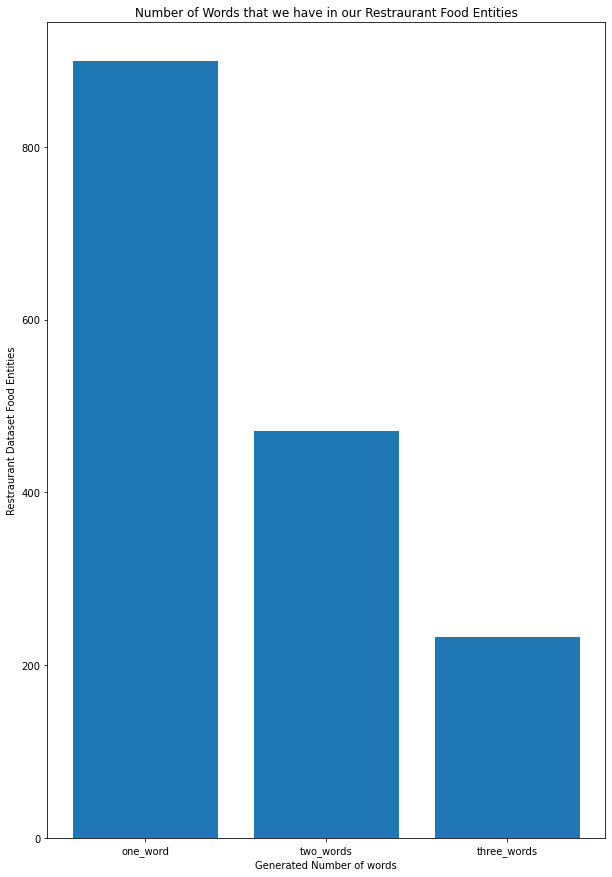

In [444]:
# here we are making the list
of = Restraurant_foods[Restraurant_foods.str.split().apply(len) == 1]
tf = Restraurant_foods[Restraurant_foods.str.split().apply(len) == 2]
thf = Restraurant_foods[Restraurant_foods.str.split().apply(len) == 3]

# plotting a bar
fig, ax = plt.subplots(figsize=(10, 15))
ax.bar([1, 2, 3], [of.size, tf.size, thf.size])

# labels x axis
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["one_word", "two_words", "three_words"])

# set title
plt.title("Number of Words that we have in our Restraurant Food Entities")
plt.xlabel("Generated Number of words")
plt.ylabel("Restraurant Dataset Food Entities")
plt.show()

In [445]:
Restraurant_foods.head(15)

0     the middle east
1          restaurant
2                  in
3                noon
5             distant
6           halsey st
7             taverna
8     chili con carne
10               four
11              japan
15            mondovi
16        connecticut
17                far
19               best
21            coalton
Name: words, dtype: object

So if we see our dataset values as plot in graph as well, we can see that this the approx estimate this can be change accordingly also we are testing our values on based on graph above ,65% are 1word restraurant food sentence , 20% are 2 words food sentence, and 15% are 3words food sentence in our dataset.

So let's work on the dataset further, such that 65% are one-worded foods, 20% are two-worded foods, and 15% are three-worded foods.

In [476]:
# total food words items
total_num_foods = round(of.size / 65 * 100)

two_worded_foods = tf.sample(frac=1)
three_worded_foods = thf.sample(frac=1)

#append
res_foods = of.append(tf[:round(total_num_foods * 0.20)]).append(thf[:round(total_num_foods * 0.15)])

for i in range(3):
    print(f"{i+1}-words total number of  Restraurant food entities:", 
          res_foods[res_foods.str.split().apply(len) == i + 1].size)

1-words total number of  Restraurant food entities: 899
2-words total number of  Restraurant food entities: 277
3-words total number of  Restraurant food entities: 207


In [447]:
#So Here we can see that we have 1-worded Restraurant food entities: 899,2-worded Restraurant food entities:277,
#3-worded Restraurant food entities: 207.

# Split train and test Restraurant food data

At this stage, we want to create different placeholders that we can insert our restraurant food entities into. 

Below I am taken a food template from below reference https://deepnote.com/@isaac-aderogba/Spacy-Food-Entities-LMLRnMOsQyGIUwvPLvVlsw it just for training the SPACY model

In [477]:
food_templates = [
    "I ate my {}",
    "I'm eating a {}",
    "I just ate a {}",
    "I only ate the {}",
    "I'm done eating a {}",
    "I've already eaten a {}",
    "I just finished my {}",
    "When I was having lunch I ate a {}",
    "I had a {} and a {} today",
    "I ate a {} and a {} for lunch",
    "I made a {} and {} for lunch",
    "I ate {} and {}",
    "today I ate a {} and a {} for lunch",
    "I had {} with my husband last night",
    "I brought you some {} on my birthday",
    "I made {} for yesterday's dinner",
    "last night, a {} was sent to me with {}",
    "I had {} yesterday and I'd like to eat it anyway",
    "I ate a couple of {} last night",
    "I had some {} at dinner last night",
    "Last night, I ordered some {}",
    "I made a {} last night",
    "I had a bowl of {} with {} and I wanted to go to the mall today",
    "I brought a basket of {} for breakfast this morning",
    "I had a bowl of {}",
    "I ate a {} with {} in the morning",
    "I made a bowl of {} for my breakfast",
    "There's {} for breakfast in the bowl this morning",
    "This morning, I made a bowl of {}",
    "I decided to have some {} as a little bonus",
    "I decided to enjoy some {}",
    "I've decided to have some {} for dessert",
    "I had a {}, a {} and {} at home",
    "I took a {}, {} and {} on the weekend",
    "I ate a {} with {} and {} just now",
    "Last night, I ate an {} with {} and {}",
    "I tasted some {}, {} and {} at the office",
    "There's a basket of {}, {} and {} that I consumed",
    "I devoured a {}, {} and {}",
    "I've already had a bag of {}, {} and {} from the fridge"
]





Now we will divide our data into a training set and  test set and We also need the data to be in a specific format for training:

In [478]:
# this is the format we require the data
data = [
    ("I love chicken", [(8, 13, "FOOD")]),
    ... 
]

In [479]:
import random

Here we are training our model to understand the Restraurant Food or Basic Food Items as in spacy we already have  entities that is already recognize by spacy library such as person , Geographiocal location etc but for food we are doing our training and testing

#creating the  dictionaries to store the generated Res_food combinations.

In [480]:
# create dictionaries to store the generated different food combinations
TRAIN_FOOD = {
    "of": [],
    "tf": [],
    "thf": []
}

TEST_FOOD = {
    "of": [],
    "tf": [],
    "thf": []
}

#limit is set to 167
FOOD_SENTENCE_LIMIT = 167


def get_food_data(count):
    return {
        1: TRAIN_FOOD["of"] if len(TRAIN_FOOD["of"]) < FOOD_SENTENCE_LIMIT else TEST_FOOD["of"],
        2: TRAIN_FOOD["tf"] if len(TRAIN_FOOD["tf"]) < FOOD_SENTENCE_LIMIT else TEST_FOOD["tf"],
        3: TRAIN_FOOD["thf"] if len(TRAIN_FOOD["thf"]) < FOOD_SENTENCE_LIMIT else TEST_FOOD["thf"],
    }[count]


pattern_to_replace = "{}"


res_foods = Restraurant_foods.sample(frac=1)


food_entity_count = res_foods.size - 1


while food_entity_count >= 2:
    entities = []

    
    sentence = food_templates[random.randint(0, len(food_templates) - 1)]

    
    matches = re.findall(pattern_to_replace, sentence)

    
    for match in matches:
        res_food = Restraurant_foods.iloc[food_entity_count]
        food_entity_count -= 1

        
        sentence = sentence.replace(match, res_food, 1)
        match_span = re.search(res_food, sentence).span()

        
        entities.append((match_span[0], match_span[1], "FOOD"))

    
    get_food_data(len(matches)).append((sentence, {"entities": entities}))

In [452]:
#here of is one food sentence , tf is two food sentence and thf is three found sentence
# this data we train from our main dataset

In [481]:
for key in TRAIN_FOOD:
    print("{} {} sentences: {}".format(len(TRAIN_FOOD[key]), key, TRAIN_FOOD[key][0]))

167 of sentences: ("I've already eaten a three pm", {'entities': [(21, 29, 'FOOD')]})
167 tf sentences: ('I ate the apple pan and pauls crossroads', {'entities': [(6, 19, 'FOOD'), (24, 40, 'FOOD')]})
167 thf sentences: ("There's a basket of wings, kamrar and reva and bernadine that I consumed", {'entities': [(20, 25, 'FOOD'), (27, 33, 'FOOD'), (38, 56, 'FOOD')]})


Here we can see we have train our data that they are picking the food items from our Data

Till here we have  approx 400 training sentences, with each sentence either containing 1, 2, or 3 FOOD entities.

In [482]:
for key in TEST_FOOD:
    print("{} {} items: {}".format(len(TEST_FOOD[key]), key, TEST_FOOD[key][0]))

460 of items: ('I decided to have some hills and dales as a little bonus', {'entities': [(23, 38, 'FOOD')]})
44 tf items: ('today I ate a oyster bar and a lavina for lunch', {'entities': [(14, 24, 'FOOD'), (31, 37, 'FOOD')]})
17 thf items: ('I tasted some ca, cazenovia and alabama at the office', {'entities': [(14, 16, 'FOOD'), (18, 27, 'FOOD'), (32, 39, 'FOOD')]})


We also have good number of test data to compare

In [455]:
# this is all train and test from our dataset

# Generating Revision/Random Data just for adding the Entities like Person , Others etc , So that our chatbot will able to predict the words in more accurate manner .

While ORG or PERSON doen't plays very important role in Restraurant NER, other entities like QUANTITY,Price, Food and 
Location will help us to better linkage with the Restraurant foods.

In [483]:
art_df = pd.read_csv("Articles.csv")

art_df.head()

Article        Date  \
0  KARACHI: The Sindh government has decided to b...  01-01-2015   
1  HONG KONG: Asian markets started 2015 on an up...  01-02-2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  01-05-2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  01-06-2015   
4  NEW YORK: US oil prices Monday slipped below $...  01-06-2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  business  
2           hong kong stocks open 0.66 percent lower  business  
3             asian stocks sink euro near nine year   business  
4                 us oil prices slip below 50 a barr  business

In [484]:
# creating the nlp object
nlp = en_core_web_lg.load()


In [485]:
try:
    
    revision_texts=[]
# convert the articles to spacy objects to better identify the sentences. Disabled unneeded components. # takes ~ 4 minutes
    for doc in nlp.pipe(art_df["Article"][:6000], batch_size=30, disable=["tagger", "ner"]):
        
        for sentence in doc.sents:
            if  40 < len(sentence.text) < 80:
                # some of the sentences had excessive whitespace in between words, so we're trimming that
                revision_texts.append(" ".join(re.split("\s+", sentence.text, flags=re.UNICODE)))
except ValueError:
    pass  # do nothing!

C:\Users\HARPREET\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [459]:
# we can neglect this value error

In [486]:
revisions = []

# Use the existing spaCy model to predict the entities, then append them to revision
for doc in nlp.pipe(revision_texts, batch_size=50, disable=["tagger", "parser"]):
    
    # don't append sentences that have no entities
    if len(doc.ents) > 0:
        revisions.append((doc.text, {"entities": [(e.start_char, e.end_char, e.label_) for e in doc.ents]}))

In [488]:
revisions

[('Train-builders CSR Corp. and China CNR Corp. soared --',
  {'entities': [(15, 24, 'ORG'), (29, 44, 'ORG')]}),
 ('"Growth momentum is still insufficient," NBS said in a statement.',
  {'entities': [(41, 44, 'ORG')]}),
 ('The single currency bought $1.2061 compared to $1.2160 in pre-holiday trade.',
  {'entities': [(28, 34, 'MONEY'), (48, 54, 'MONEY'), (58, 69, 'DATE')]}),
 ('(AFP) ', {'entities': [(1, 4, 'ORG')]}),
 ('The benchmark Hang Seng Index dipped 158.63 points to 23,699.19.',
  {'entities': [(14, 29, 'ORG'), (37, 43, 'CARDINAL'), (54, 63, 'CARDINAL')]}),
 ('Gold was at $1,203.59.40 an ounce, compared with $1,196.40 on Monday.',
  {'entities': [(13, 24, 'MONEY'), (50, 58, 'MONEY'), (62, 68, 'DATE')]}),
 ('(AFP) ', {'entities': [(1, 4, 'ORG')]}),
 ('(AFP) ', {'entities': [(1, 4, 'ORG')]}),
 ('(AFP) ', {'entities': [(1, 4, 'ORG')]}),
 ('(AFP) ', {'entities': [(1, 4, 'ORG')]}),
 ('the American one," World Bank chief economist Kaushik Basu said.',
  {'entities': [(4, 12, 'NORP'), 

#Split train and test revision data thst we have created

In [489]:

print(revisions[0][0])


print(revisions[0][1])

Train-builders CSR Corp. and China CNR Corp. soared --
{'entities': [(15, 24, 'ORG'), (29, 44, 'ORG')]}


When we are dividing the data into training and test , we have to make sure  that our dummy or revision training data must have at least 100 examples of various types of entity types  and we can declare in our python code below by using the object "REVISION_SENTENCE_SOFT_LIMIT = 100"[2]


In [490]:
#creating the train and test revision data
TRAIN_REVISION_DATA = []
TEST_REVISION_DATA = []


TRAIN_ENTITY_COUNTER = {}
TEST_ENTITY_COUNTER = {}


REVISION_SENTENCE_SOFT_LIMIT = 100


def increment_revision_counters(entity_counter, entities):
    for entity in entities:
        label = entity[2]
        if label in entity_counter:
            entity_counter[label] += 1
        else:
            entity_counter[label] = 1

random.shuffle(revisions)
for revision in revisions:
   
    entities = revision[1]["entities"]

    
    should_append_to_train_counter = 0
    for _, _, label in entities:
        if label in TRAIN_ENTITY_COUNTER and TRAIN_ENTITY_COUNTER[label] > REVISION_SENTENCE_SOFT_LIMIT:
            should_append_to_train_counter -= 1
        else:
            should_append_to_train_counter += 1

    
    if should_append_to_train_counter >= 0:
        TRAIN_REVISION_DATA.append(revision)
        increment_revision_counters(TRAIN_ENTITY_COUNTER, entities)
    else:
        TEST_REVISION_DATA.append(revision)
        increment_revision_counters(TEST_ENTITY_COUNTER, entities)

In [491]:
TRAIN_ENTITY_COUNTER

{'GPE': 146,
 'NORP': 105,
 'PERCENT': 104,
 'ORG': 139,
 'CARDINAL': 113,
 'MONEY': 112,
 'DATE': 178,
 'ORDINAL': 74,
 'PERSON': 113,
 'LOC': 40,
 'QUANTITY': 51,
 'TIME': 31,
 'PRODUCT': 8,
 'WORK_OF_ART': 7,
 'EVENT': 4}

Below we can see the entities count in our revision TEST_ENTITY_RES_COUNTER sentences. 

In [492]:
TEST_ENTITY_COUNTER

{'DATE': 1290,
 'CARDINAL': 563,
 'ORG': 821,
 'GPE': 966,
 'MONEY': 940,
 'PERSON': 499,
 'PERCENT': 528,
 'QUANTITY': 13,
 'PRODUCT': 4,
 'LOC': 24,
 'ORDINAL': 66,
 'NORP': 123,
 'TIME': 17,
 'WORK_OF_ART': 5,
 'EVENT': 4}

# Now lets move to our Final Step i.e.Train the NER Model

In [466]:
#For every Restraurant food sentence, we have our revision sentence that is loaded above

In [493]:
#Combining the data
TRAIN_FOOD_DATA_COMBINED = TRAIN_FOOD["of"] + TRAIN_FOOD["tf"] + TRAIN_FOOD["thf"]


print("RES FOOD", len(TRAIN_FOOD_DATA_COMBINED))


print("REV", len(TRAIN_REVISION_DATA))


TRAIN_DATA = TRAIN_REVISION_DATA + TRAIN_FOOD_DATA_COMBINED
print("COMBINED", len(TRAIN_DATA))

RES FOOD 501
REV 669
COMBINED 1170


In [494]:
TRAIN_DATA

[('�The government of Pakistan will purchase it,� he added.',
  {'entities': [(19, 27, 'GPE')]}),
 ('while the pan-European index of major banks was up 1.6 percent.',
  {'entities': [(10, 22, 'NORP'), (51, 62, 'PERCENT')]}),
 ('reaction to the Fed in currency markets was much more muted.',
  {'entities': [(16, 19, 'ORG')]}),
 ('The benchmark Hang Seng Index added 56.75 points to 24,169.35.',
  {'entities': [(14, 23, 'ORG'), (36, 41, 'CARDINAL'), (52, 61, 'CARDINAL')]}),
 ('But the dollar rose to 122.95 yen from 122.84 yen Wednesday in New York.',
  {'entities': [(23, 33, 'MONEY'),
    (39, 49, 'MONEY'),
    (50, 59, 'DATE'),
    (63, 71, 'GPE')]}),
 ('He said OGRA has sent letter to CNG Associations regarding the issue.',
  {'entities': [(8, 12, 'ORG'), (32, 48, 'ORG')]}),
 ('U.S. gold for April delivery was flat at $1,127.30 an ounce.',
  {'entities': [(0, 4, 'GPE'), (14, 19, 'DATE'), (42, 50, 'MONEY')]}),
 ('US crude was trading down 17 cents at $48.52 a barrel.',
  {'entities': [(0,

In [495]:
import random

In [496]:
from spacy.util import minibatch, compounding

In [497]:
from pathlib import Path

In [472]:
#Adding a Pipeline[2]

In [498]:
# add NER [2]
# adding a label food
from spacy.training import Example
ner = nlp.get_pipe("ner")
ner.add_label("FOOD")


pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]
#number of Epochs

epochs = 5
optimizer = nlp.resume_training()
with nlp.disable_pipes(*other_pipes), warnings.catch_warnings():
    warnings.filterwarnings("once", category=UserWarning, module='spacy')
    sizes = compounding(1.0, 4.0, 1.001)
    
    
    for epoch in range(epochs):
        
        random.shuffle(TRAIN_DATA)
        losses = {}
        
        for batch in minibatch(TRAIN_DATA, size=4):
            for text, annotations in batch:
                doc = nlp.make_doc(text)
                example = Example.from_dict(doc, annotations)
                nlp.update([example], drop=0.35, sgd=optimizer, losses=losses)

        print("Losses ({}/{})".format(epoch + 1, epochs), losses)

C:\Users\HARPREET\anaconda3\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "I had a in seven years , a niue and in one hour at..." with entities "[(8, 23, 'FOOD'), (27, 31, 'FOOD'), (36, 47, 'FOOD...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(


Losses (1/5) {'ner': 1491.8727220830003}
Losses (2/5) {'ner': 870.3289849368949}
Losses (3/5) {'ner': 675.7503401688607}
Losses (4/5) {'ner': 554.4643416385468}
Losses (5/5) {'ner': 539.702240864197}


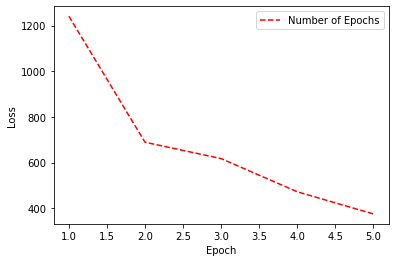

In [499]:
list1=[1,2,3,4,5] # number of epochs
list2=[1240.57,689.203,617.54,472.461,375.49]# losses
plt.plot(list1,list2,'r--')
plt.legend(['Number of Epochs', 'Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Above graph indicates that as the Number of Epochs are increasing the loss in our model is also decreasing so running more EPochs will generate more loss and we can get more accuracy according to that.

In [ ]:
#For 05 epoch it takes more than 20+ minutes for my system

In [ ]:
#For 30 epoch it takes more than 90+ minutes for my system

# Now we are Evaluating the model[2]

In [500]:

spacy.displacy.render(nlp("Infosys is looking to buy startup of $1 Billion dollar"), style="ent")

In [509]:
# here we are displaying using our Target i.e Restraurant food Entities 
spacy.displacy.render(nlp("I had a fish and chips in dinner today."), style="ent")
spacy.displacy.render(nlp("I order chocolate pie for me."), style="ent")
spacy.displacy.render(nlp("I have ordered basmati rice, carrot and cheese from Tesco on 23th April 2021"), style="ent")


Here we can see our model SPACY is fairly recognising our Food Items , Date and location etc, Earlier our non customized SPACY model is not recognizing all these.

# Evaluating Food Entities

In [502]:
#Dictionary
fe_1 = { #food evaluation
    "of": {
        "correct": 0,
        "total": 0,
    },
    "tf": {
        "correct": 0,
        "total": 0
    },
    "thf": {
        "correct": 0,
        "total": 0
    }
}

we_1 = { #word evaluation
    "1_worded_foods": {
        "correct": 0,
        "total": 0
    },
    "2_worded_foods": {
        "correct": 0,
        "total": 0
    },
    "3_worded_foods": {
        "correct": 0,
        "total": 0
    }
}


for key in TEST_FOOD:
    foods = TEST_FOOD[key]

    for food in foods:
        
        sentence = food[0]
        entities = food[1]["entities"]

        
        for entity in entities:
            doc = nlp(sentence)
            correct_text = sentence[entity[0]:entity[1]]
            n_worded_food =  len(correct_text.split())

            
            for ent in doc.ents:
                if ent.label_ == entity[2] and ent.text == correct_text:
                    fe_1[key]["correct"] += 1
                    if n_worded_food > 0:
                        we_1[f"{n_worded_food}_worded_foods"]["correct"] += 1
                    
                    
                    break
            
            
            fe_1[key]["total"] += 1
            if n_worded_food > 0:
                we_1[f"{n_worded_food}_worded_foods"]["total"] += 1

In [503]:
l1=[]
l2=[]
for key in we_1:
    correct = we_1[key]["correct"]
    total = we_1[key]["total"]

    print(f"{key}: {correct / total * 100:.2f}%")
    l2.append(f"{key}")

f_tot_sum = 0
f_corr_sum = 0

print("---")
for key in fe_1:
    correct = fe_1[key]["correct"]
    total = fe_1[key]["total"]
    
    f_tot_sum += total
    f_corr_sum += correct
    

    print(f"{key}: {correct / total * 100:.2f}%")
    #l2.append(f"{key}%")
    l1.append(correct / total * 100)
#getting total percentage of the food items
print(f"\nTotal: {f_corr_sum/f_tot_sum * 100:.2f}%")

1_worded_foods: 90.76%
2_worded_foods: 95.68%
3_worded_foods: 85.51%
---
of: 90.43%
tf: 95.45%
thf: 94.12%

Total: 91.49%


In [ ]:
l2

In [ ]:
l1

Here of means one word food sentence, tf is two worded food sentence and thf is three worded food sentence

Here we can see the good figures , we can see we are getting approx 92% of correct evaluation of one word food sentence and approx 97% of three word res food sentence and 89% of two worded food sentence , In total we are getting 93% approx correct evualtion of our words. So we can say that our model is very well trained in Terms of recognising the Restraurant Food items correctly.

Lets plot the above result in bar plot

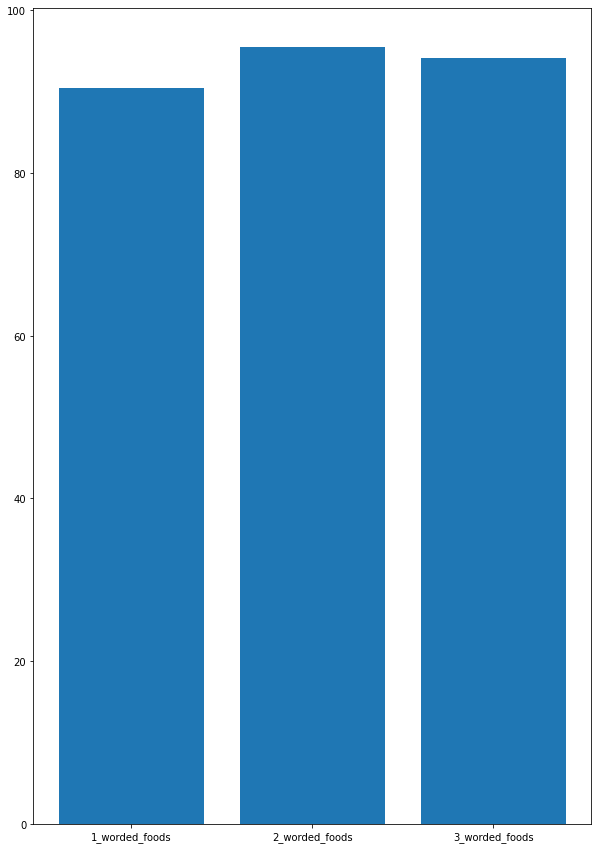

In [504]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,15))
plt.bar(l2,l1)
plt.show()

Now lets Evaluating Existing Entities

In [505]:

ee = {} #evaluauion of entity


def update_results(entity, metric):
    if entity not in ee:
        ee[entity] = {"correct": 0, "total": 0}
    
    ee[entity][metric] += 1


for data in TEST_REVISION_DATA:
    sentence = data[0]
    entities = data[1]["entities"]

    for entity in entities:
        doc = nlp(sentence)
        correct_text = sentence[entity[0]:entity[1]]

        for ent in doc.ents:
            if ent.label_ == entity[2] and ent.text == correct_text:
                update_results(ent.label_, "correct")
                break

        update_results(entity[2], "total")

Using the in built entities in SAPCY we have found the accuracy that we have train in our model for each and every entities used in SPACY

In [506]:
st = 0
sc = 0
list1=[]
list2=[]

for entity in ee:
    total = ee[entity]["total"]
    correct = ee[entity]["correct"]

    st += total
    sc += correct
    
    
    print("{} | {:.2f}%".format(entity, correct / total * 100))
    list1.append(entity)
    list2.append(correct / total * 100)

print()
print("Overall accuracy: {:.2f}%".format(sc / st * 100))

DATE | 85.81%
CARDINAL | 83.66%
ORG | 80.02%
GPE | 96.27%
MONEY | 92.55%
PERSON | 91.98%
PERCENT | 95.08%
QUANTITY | 100.00%
PRODUCT | 0.00%
LOC | 83.33%
ORDINAL | 93.94%
NORP | 97.56%
TIME | 82.35%
WORK_OF_ART | 20.00%
EVENT | 0.00%

Overall accuracy: 89.14%


In [ ]:
list1

In [ ]:
list2

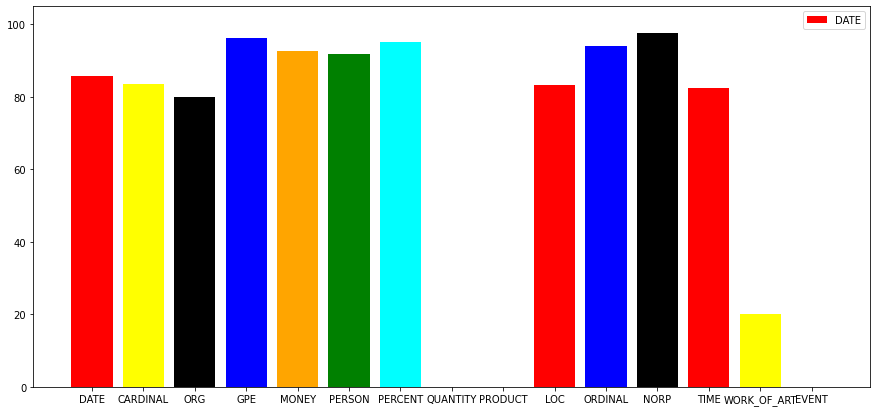

In [507]:
c = ['red', 'yellow', 'black', 'blue', 'orange','green','cyan','white','magenta','red','blue','black']
plt.figure(figsize=(15,7))

plt.bar(list1,list2,color=c)

plt.legend(list1)
plt.show()

Here in graph we rae displaying the percantage of the accuracy of the entity we are getting on our data

So here we can see the after training the accuracy is reached 88% approx which is quite better as it is giving more efficient result then the BERT models

In [508]:
# lets give some example statement

spacy.displacy.render(nlp("I ordered rice, chicken and fish from Hilton on 23 April 2020"), style="ent")

# Result and Conclusion for SPACY Model

# Lets Compare the Result of the all models that we train and their outcome

In [ ]:
'''#Customized SPACY Model
plt.subplot(1,2,1)
list1=[1,2,3,4,5] # number of epochs
list2=[1399.727,729.641,607.90,551.052,495.871]# losses
plt.plot(list1,list2,'r--')
plt.legend(['Number of Epochs', 'Loss'])
plt.title('Customised SPACY MODEL')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#SPACY Model
plt.subplot(1,2,2)
list1=[1,2,3,4,5] # number of epochs
list2=[1498.89,1068.78,803.585,732.877,697.074]# losses
plt.plot(list1,list2,'r--')
plt.legend(['Number of Epochs', 'Loss'])
plt.title('SPACY MODEL')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.tight_layout()
plt.show()'''

Here in the Customized SPACY model we can see that the loss is less as compared to our SPACY models hence have little more accuracy and more effiecient then our non customized SPACY Model. we see in the output as well customized SPACY models give more accurate result then our SPACY Model. Also we can see that as we EPOCHS is increasing loss is decreasing so we are assuming that we we increase more Epochs now its value set to 5 , If we increase more than that then the loss will decrease and accuracy will increase.

SPACY Model Output
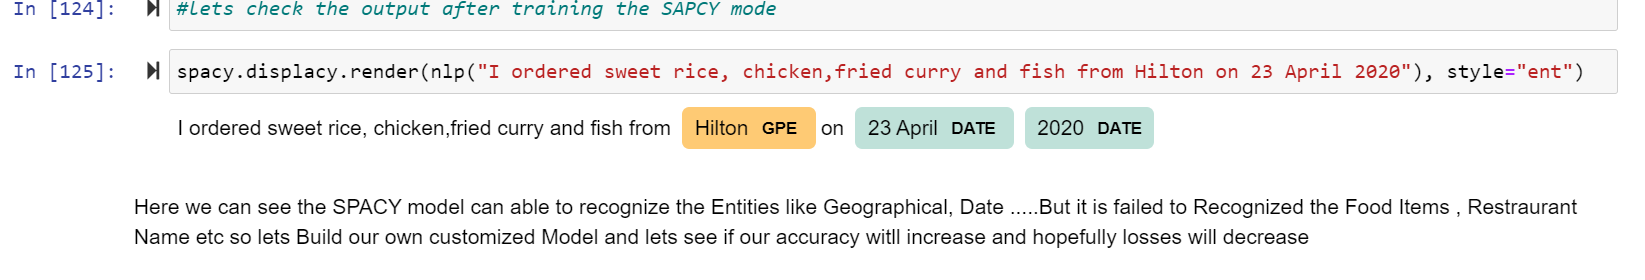


Customized SPACY Model Output:
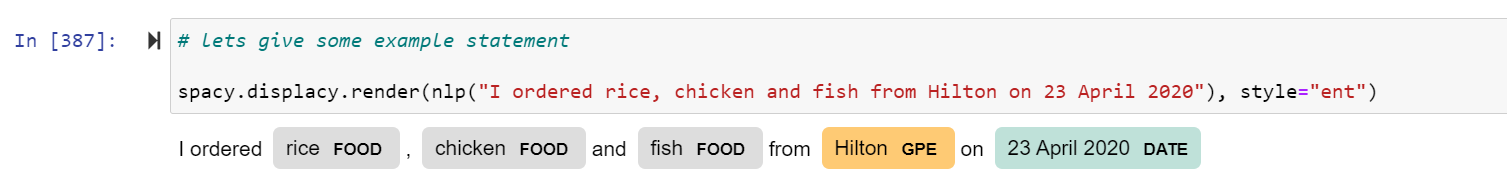


In [ ]:
'''#Customized SPACY Model
plt.subplot(1,2,1)
list1=[1,2,3,4,5] # number of epochs
list2=[1240.57,689.203,617.54,472.461,375.49]# losses
plt.plot(list1,list2,'r--')
plt.legend(['Number of Epochs', 'Loss'])
plt.title('Customised SPACY MODEL')
plt.xlabel('Epochs')
plt.ylabel('Loss')

#BERT Model
plt.subplot(1,2,2)
plt.plot(rk,rv,"r--")
plt.title("BERT Model")
plt.xlabel('Classification matrix')
plt.ylabel('Score')
#plt.legend()
plt.tight_layout()
plt.show()

Here in the above graphs it clearly show that loss is less in BERT model hence giving more accuracy that is 97% followed by Customized SPACY model i.e. 87% approx but we can see that BERT is less efficient then of SPACY reason being it cant able to correctly Identified the correct Entity whereas with less accuracy of SPACY then BERT model it can predict the correct Entity in our sentence .

In [ ]:
'''l2=[]
s1=0
for i in range(1,len(rv)):
    l2.append(rv[i]*100)
   

In [ ]:
'''accuracy_BERT=sum(l2)/len(l2)
b=["BERT Accuracy"]

In [ ]:
#from above SPACY values for accuracy for each entity
'''list2

In [ ]:
'''accuracy_SPACY=sum(list2)/(len(list2)-2)
s=["SPACY"]

In [ ]:
'''accuracy_SPACY

In [ ]:
'''accuracy_BERT

In [ ]:
'''plt.figure(figsize=(10,7))
plt.bar(s,accuracy_SPACY)
plt.bar(b,accuracy_BERT)
models=['SPACY ->88%','BERT->97%']
plt.legend(models)
plt.show()

As discussed above BERT model  giving more accuracy that is 97% followed by Customized SPACY model i.e. 87% approx but we can see that BERT is less efficient then of SPACY reason being it cant able to correctly Identified the correct Entity whereas with less accuracy of SPACY then BERT model it can predict the correct Entity in our sentence .

Steps we can do in BERT model to make it more efficient :

1. We can increase the number of Epochs in BERT model so that our efficency in predicting the Entities will increase

2. We can add dummy dataset as in our dataset we donot have Entity like Person , Location so we can add some text or dummy dataset so that we can train BERT model with that dataset also in order to make a chatbot effective in predicting the Entities.

3. We can do hyper Parameter Tuning like we can change the learning Rate or Random State and check the accuracy .


Steps we can do in SPACY model to increase the accuracy:


1. We can add more Entities based on our Dataset and Train the SPACY accordingly this will increase the efficiency and accuracy.

2. We can perform hyper paramter Tuning in this also.

3. We can increase the Iteations of Epochs in SPACY model as well not we are training our data with Epochs value as 5 ... We can increase the Epochs value to 15-20 , As we have seen in above graphs as Epochs increases then number of losses is decrease hence there will be increase in accuracy .

Lets Discuss more in dept on below questions :

# 1. Can the chatbot components you experimented with fulfil their purpose?”


If we check in BERT model although it is giving the 97-98% of accuracy but it can't identifies in between Person and Restraurant name as per our Dataset as shown in above output [[{'order': 'served_dish'}, {'fish': 'served_dish'}]] as shoen in below screenshot 1 ,So although the accuracy is really good but it doesn't fulfil our coorect needs because output should be [{'Kevin': 'person'},{'Tesco': 'Org'}]] and rest things it is predicting correct. So even the good accuracy doesn't lead to accurate result , to make this more efficient we can use some dummy dataset that contains some random data or some random test that defines person name and location as a Entity as we done in SPACY model.

Screenshot 1:


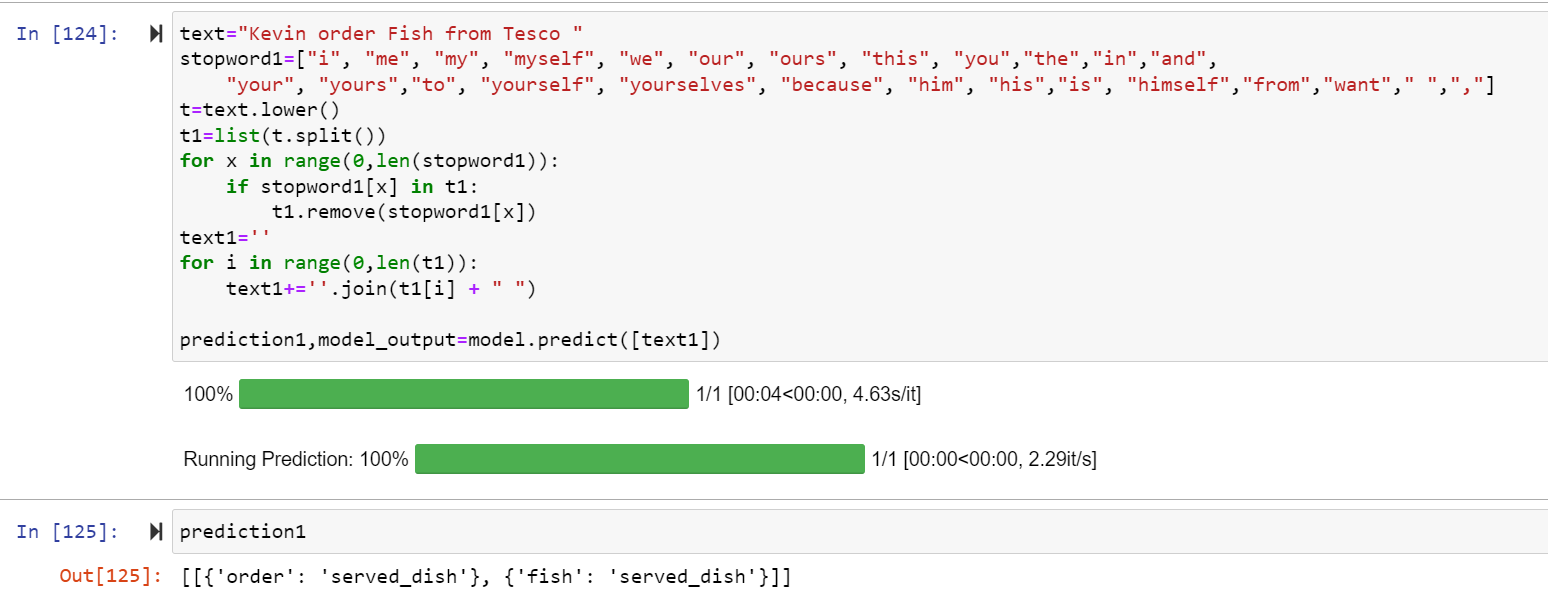

If we see SPACY models, Here we think to add one more Entity with name "food" as we are working on Dataset of the resturant with already have the Entity with the name "Restraurant","Restraurant_Type" but we donot have the any Entity with "Food" as we are working with Restraurant dataset ,We think to add one Entity with "Food" to check what will be Impact on accuracy . Here I have taken one Revision Dataset as well just to add the Cardinality so that our chatbot become more effiicient in finding the Person Name and Restraurant Name as shown above the overall accuracy is fine i.e 88%(approx) and we can seen below the output for accuracy of every entity with seems to be good except the product .


DATE | 86.84%
PERSON | 66.67%
ORG | 87.88%
PERCENT | 100.00%
MONEY | 96.23%
GPE | 93.48%
QUANTITY | 100.00%
CARDINAL | 50.00%
ORDINAL | 100.00%
LOC | 100.00%

Overall accuracy: 88.00%



And In SPACY model after training of data when we have given the input we can see in below screenshot that our model is correctly able to find location ,person,quantity and food. So we can say that although our SPACY model is giving less accuracy then BERT model but it is more efficient than that of BERT.

Screenshot of above Output:

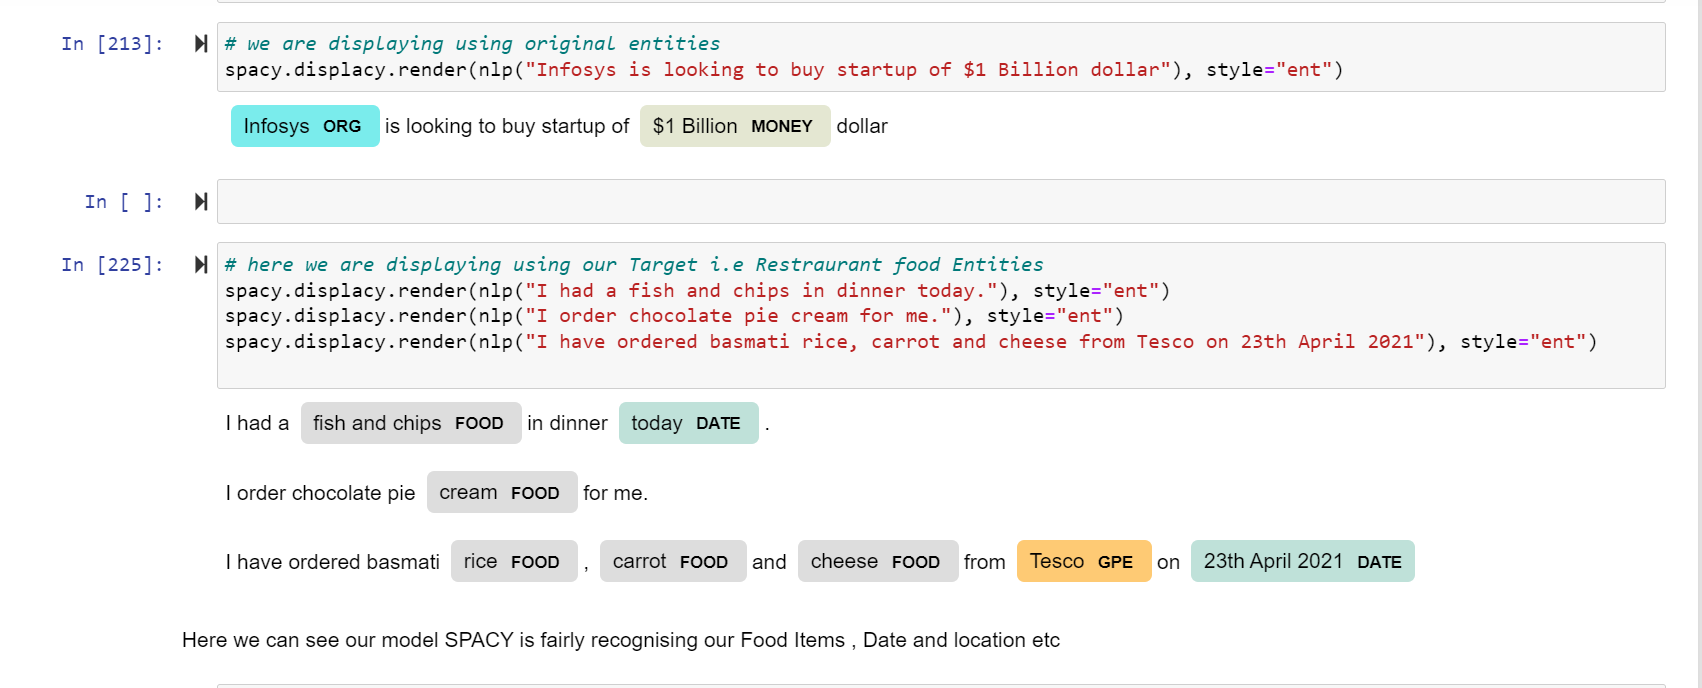


So here we can say that if we compare Both the models we can say that SPACY has more efficient and fulfil our needs as per our dataset and our requirement and works more efficiently than BERT .

# 2.What is good enough accuracy?

Here if we see that good enough accuracy that we are getting here is aroung 97% for the BERT model but as suggested in BERT model the accuracy is really good but it is not as much as effective because  as per our result /output  as shown in Screenshot 2 below  giving the result as  [[{'order': 'served_dish'}, {'fish': 'served_dish'}]]  so although the accuracy is really good but it doesn't fulfil our requirement because output should be [{'Kevin': 'person'},{'Tesco': 'Org'}]] but it is not showing for the same, as it should Identifies Kevin as a Person. So if we see our dataset our vision is to design a Chatbot that able user to select the good restraurant , Good Food ,Order Table and so on .... and If the model fails to Identify the whether it is a Restraurant name or Person name that it will directly impact our chatbot efficiency , Although in BERT accuracy is really good that is 97% but SPACY is really effiecent in giving the correct Entities name and we will use SAPCY further for making our Chatbot to final stage 


Screenshot 2:
 
 
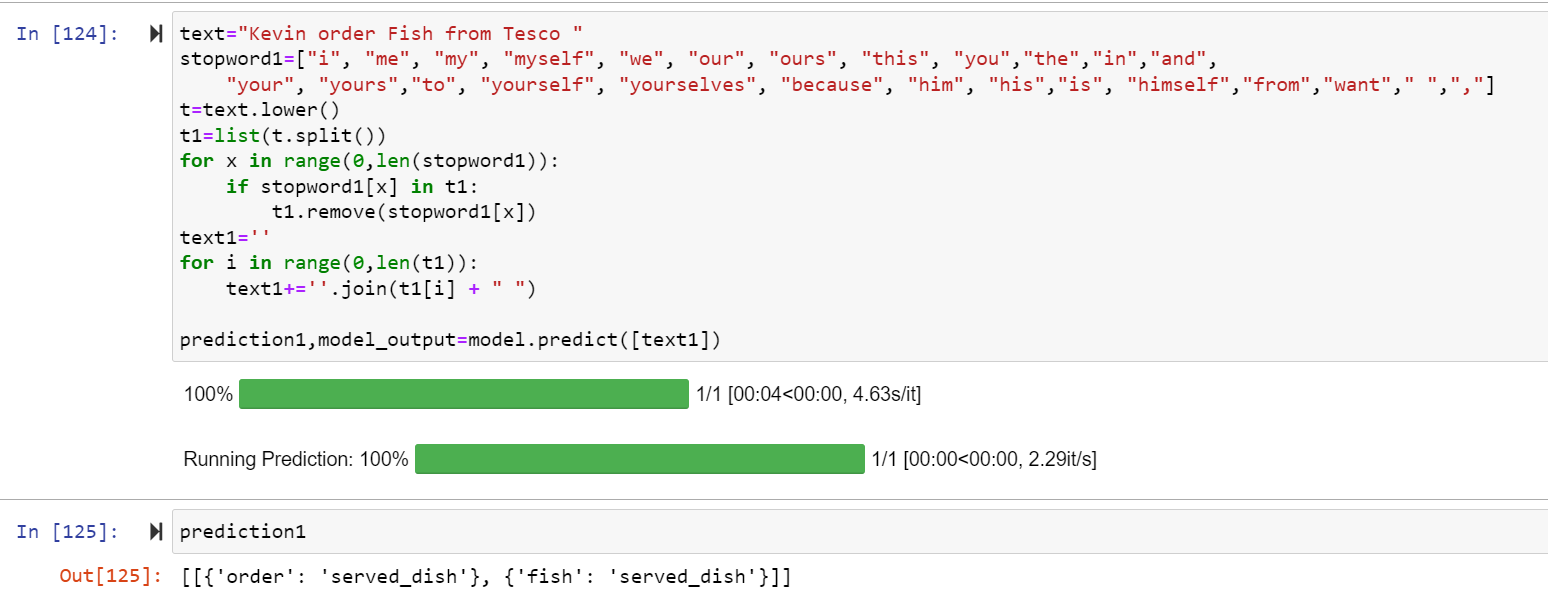

# 3. If any of the models did not perform well, what is needed to improve?

Here we can say that our BERT models didn't perform really well as per our Expectations , Here If we check in BERT model although it is giving the 97-98% of accuracy but it can't identifies the Person and Restraurant name as per our result as shown in above output we have given the text as the input as "Kevin order fish from Tesco" in which it can't identifies the Kevin and Tesco and only identifies [[{'order': 'served_dish'}, {'fish': 'served_dish'}]] , It is recommending the same Entity for one thing , So although the accuracy is really good but it doesn't fulfil our actual result because output should be [{'Kevin': 'person'},{'India': 'location'}]]. So even the good accuracy doesn't lead to accurate result , to make this more efficient we can use either some dummy dataset that contains some random data or the Entities like Person , Location ,Money e.t.c as so that it is easy for our model to train the word weather a word fall in PERSON or OTHERS because in our current Dataset there are no entities that define the Person or Others or we can introduce some entities name like Person or Others that will help our BERT model to be more accurate and effiecient.Likely we have done in SPACY that we have introduce our new Entity Food and it is giving really good result.


Things we can do in BERT model to make it more efficient :

1. We can increase the number of Epochs in BERT model so that our efficency in predicting the Entities will increase

2. We can add dummy dataset as in our dataset we donot have Entity like Person , Location so we can add some text or dummy dataset so that we can train BERT model with that dataset also in order to make a chatbot effective in predicting the Entities.

3. We can do hyper Parameter Tuning like we can change the learning Rate or Random State and check the accuracy .

4. Introduce more Entities and increase the number of Epochs.


# 4.If any of the models performed really well, could you make it more efficient and sacrifice some quality?

As from our above result we can see that in terms of accuracy BERT model done really well but in terms of efficiency SPACY model works really well . We have make SPACY models more efficient by increasing the value for epochs as of now we are training them on value of'5' , So increasing the value for epochs i.e. 10-20 Epochs will increase some efficiency, epochs is generally a number of passes taken by out training data through that machine[1] learning model so increasing the epochs will increase some accuracy of our data/model for sure , In order to make model more efficient likewise we have added the Food Entities we have to add some more Entities so that our model can predict and pick more correct Entities which will help our chatbot in recognizing and giving the correct reply to the user once we have made our Final Chatbot.

Things we can do in SPACY model to increase the efficiency:


1. We can add more Entities based on our Dataset and Train the SPACY accordingly this will increase the efficiency and accuracy.

2. We can perform hyper paramter Tuning in this also.

3. We can increase the Iteations of Epochs in SPACY model as well not we are training our data with Epochs value as 5 ... We can increase the Epochs value to 15-20 , As we have seen in above graphs as Epochs increases then number of losses is decrease hence there will be increase in accuracy .




# References

[1]https://www.javatpoint.com/epoch-in-machine-learning#:~:text=%20These%20are%20as%20follows%3A%20%201%20Epoch,training%20of%20the%20machine%20learning%20model.%20More%20

[2]https://deepnote.com/@isaac-aderogba/Spacy-Food-Entities-LMLRnMOsQyGIUwvPLvVlsw

[3]https://github.com/karndeepsingh/Named-Entity-Recognition/blob/main/NAMED%20ENTITY%20RECOGNITION.ipynb

[4]https://www.guru99.com/stemming-lemmatization-python-nltk.html#:~:text=Stemming%20and%20Lemmatization%20in%20Python%20NLTK%20are%20text,it%20knows%20the%20context%20of%20words%20before%20processing.

[5]https://www.mygreatlearning.com/blog/bag-of-words/#:~:text=Bag%20of%20words%20is%20a%20Natural%20Language%20Processing,more.%20What%20is%20Bag%20of%20Words%20in%20NLP%3F

# Dataset Link


1. https://www.kaggle.com/datasets/swapnilpote/restaurant-chatbot-dataset-intent-entity(Our Group Dataset)

2.https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles(This is my own Dummy Dataset to train model more efficiently)